# **1. Importing Libraries**

## Install Python Packages

In [ ]:
# Install Python packages using pip.

# The "!pip" command allows you to run shell commands in Jupyter Notebook or Colab cells.
# It is used here to install Python packages.
# The "-y" flag stands for "yes", which means automatically answers "yes" to any prompts or confirmation messages.
# The "-q" flag stands for "quiet", which means it will suppress output during installation.
# The "-U" flag stands for "update", which maens it will automatic update the latest version of packages after installed
# "feature_engine", "catboost", "scikit-learn" and "shap" are the packages being installed.
# The "2>/dev/null" part redirects any error messages (stderr) to the null device, effectively silencing them.
# This is often used when you want to hide installation messages.

# Uninstall old version scikit-learn
!pip uninstall -q scikit-learn -y
# Install and update latest version
!pip install -q -U scikit-learn feature_engine catboost shap 2>/dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 43.4 MB/s eta 0:00:00


## Import Necessary Libraries

In [ ]:
# Import necessary libraries
import numpy as np  # Import NumPy for handling numerical operations
import pandas as pd  # Import Pandas for data manipulation and analysis
pd.set_option('display.max_rows', 1000) # Set Pandas options to display a maximum of 1000 rows

# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set up matplotlib style
plt.style.available # Show list of available styles
plt.style.use('seaborn-whitegrid')

# Import re for working with text and regular expressions
import re

# Import warnings to ignore error
import warnings
warnings.filterwarnings("ignore")

# Import time for measuring execution time of traning model
import time

<ipython-input-2-53444f24d2b4>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Import Machine Learning and Data Pre-Processing Module

### Data Procesing Modules

In [ ]:
# Data Processing Modules
# Import mean_squared_error and accuracy_score for evaluating model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Import train_test_split for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Import CountVectorizer from sklearn.feature_extraction.text for text feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Import RareLabelEncoder from feature_engine.encoding for encoding categorical features
from feature_engine.encoding import RareLabelEncoder

# Import EqualWidthDiscretiser from feature_engine.discretisation to divides continuous numerical variables into intervals of the same width
from feature_engine.discretisation import EqualWidthDiscretiser

# Import LabelEncoder from sklearn.preprocessing for encoding categorical features
from sklearn.preprocessing import LabelEncoder

# Import StandardScaler from sklearn.preprocessing for normalization data
from sklearn.preprocessing import StandardScaler

# Import SHAP for interpreting model predictions
import shap

### Machine Learning Modules

In [ ]:
# Machine Learning Modules
# Import CatBoostRegressor for building a regression model
from catboost import Pool, CatBoostRegressor

# Import BaggingRegression  for building a regression model
from sklearn.ensemble import BaggingRegressor

# Import tree Module for building regression model
from sklearn import tree

# Import RandomForestRegressor Module for building regression model
from sklearn.ensemble import RandomForestRegressor

# Import KNearestNeighbor Module for bulding regression model
from sklearn.neighbors import KNeighborsRegressor

# Import XGBoost for building a regression model
import xgboost as xgb

# Import svm for building a regression model
from sklearn.svm import SVR

# **2. Loading Dataset**

In [ ]:
%%time
# Load car_details datasets
car_details = pd.read_csv("https://www.dropbox.com/scl/fi/rgw27rznokb7uxy0rx3q8/car_detail_en.csv?rlkey=njbaikk655p9zgvg4g6f8fufa&dl=1")

# Check for dupication
item0 = car_details.shape[0]  # Stores the initial number of rows in the DataFrame
df = car_details.drop_duplicates()  # Removes duplicate rows from the DataFrame
item1 = car_details.shape[0]  # Stores the number of rows after removing duplicates
print(f"There are {item0-item1} duplicates found in the dataset")  # Prints the number of duplicates that were removed

# Rename columns
car_details.rename(columns={'price. price': 'price'}, inplace=True)

# Function to convert price to numerical
def price_to_numeric(price):
    try:
        if "Billion" in price and not "Million" in price:
            return float(price.replace("Billion", "").replace(" ", ""))*1000
        elif "Million" in price and not "Billion" in price:
            return float(price.replace("Million", "").replace(" ", ""))
        else:
            return float(price.replace("Billion", "").replace("Million", "").replace(" ", ""))
    except:
        return None

car_details['price'] = car_details['price'].apply(price_to_numeric) # Convert price to numerical
car_details['log10_price'] = np.log10(car_details['price']) # Standardization
car_details = car_details[~car_details['price'].isnull()] # Drop missing data

# Function to convert mileage to numerical
def mileage_to_numeric(mileage):
    try:
        return float(mileage.rstrip(' Km').replace(" ", '').replace(',',''))
    except:
        return None

car_details['mileage'] = car_details['mileage'].apply(mileage_to_numeric) # Convert mileage to numerical
car_details['log10_mileage'] = np.log10(car_details['mileage']+1) # Standardization (+1 to avoid Zero Devision Error)

# Get fuel consumptions
def get_fuel_consumption(fuel_consumption):
    result = str(fuel_consumption).replace("L/100Km", "").rstrip("\t").replace(',','').strip() # Remove non-numeric charater
    pattern = r'[A-Za-z]'
    result = re.sub(pattern,'', result)  # Remove non-numeric charaters
    if result:
        return float(result)
    else:
        return 'None'

car_details['fuel_consumption'] = car_details['fuel_consumption'].apply(get_fuel_consumption)

# Get fuel-type
car_details['fuel_type'] = car_details['engine'].apply(lambda engine: str(engine).split('\t')[0])

# Get engine size
def get_engine_type(engine):
    result = str(engine).split('\t')[-1]
    if "L" in result:
        return result
    else:
        return 'None'

car_details['engine_size'] = car_details['engine'].apply(get_engine_type)

# Combine brand and grade
car_details['brand_grade'] = car_details['brand'] + ' ' + car_details['grade']

# Get number of doors
def get_num_of_doors(num_of_doors):
    result = int(str(num_of_doors).split('-')[0])
    return result

car_details['num_of_doors'] = car_details['num_of_doors'].apply(get_num_of_doors)
item0 = car_details.shape[0] # Stores the initial number of rows in the DataFrame
car_details = car_details[car_details['num_of_doors']<=7.0] # Remove incorrect data form the Dataframe
item1 = car_details.shape[0] # Stores the number of rows after removing incorrect data
print(f"There are {item0-item1} incorrect data of num_of_doors found in the dataset")  # Prints the number of incorect data that were removed

# Get seating_capacity
def get_seating_capacity(seating_capacity):
    result = int(str(seating_capacity).split('-')[0])
    return result

car_details['seating_capacity'] = car_details['seating_capacity'].apply(get_seating_capacity) # Get seating_capacity
item0 = car_details.shape[0]  # Stores the initial number of rows in the DataFrame
car_details = car_details[car_details['seating_capacity']>0].reset_index() # Remove incorrect data form the Dataframe
item1 = car_details.shape[0]  # Stores the number of rows after removing incorrect data
print(f"There are {item0-item1} incorrect data of seating_capacity found in the dataset")  # Prints the number of incorect data that were removed

# Load sellers dataset
sellers = pd.read_csv("https://www.dropbox.com/scl/fi/43z1otcuxh9ts26aiw0pk/seller.csv?rlkey=4rnjuq2tp3581rg37m0065twx&dl=1")

# Rename Columns
sellers.rename(columns = {"Mã tin": 'ad_id',
                          "Địa chỉ": "region"}, inplace=True)

# Select only specific columns of interest
sellers = sellers[['ad_id', 'region']]

# Get city name from address
def get_city_name(address):
  # Remove duplicate space in string
  pattern = ' +' # More than 1 space continuously
  address = re.sub(pattern, ' ', address)
  # Check if 2-3 last word are city name
  if ' '.join(address.strip(' ').split(' ')[-2:]) == 'Thiên Huế':
    return ' '.join(address.strip(' ').split(' ')[-3:])
  else:
    return ' '.join(address.strip(' ').split(' ')[-2:])

sellers['region'] = sellers['region'].apply(get_city_name)

# Merge car_details with sellers
car_details = pd.merge(car_details, sellers, on="ad_id", how="left")

# Select only specific columns of interest
selected_cols = ['price', 'log10_price', 'origin', 'condition', 'car_model', 'mileage',
                 'log10_mileage','exterior_color', 'interior_color', 'num_of_doors',
                 'seating_capacity','fuel_type', 'engine_size', 'transmission','drive_type',
                 'fuel_consumption', 'brand_grade', 'year_of_manufacture', 'region']
car_details = car_details[selected_cols]

print(car_details.shape)

There are 0 duplicates found in the dataset
There are 8 incorrect data of num_of_doors found in the dataset
There are 55 incorrect data of seating_capacity found in the dataset
(30417, 19)
CPU times: user 1.19 s, sys: 111 ms, total: 1.3 s
Wall time: 5.91 s


In [ ]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30417 entries, 0 to 30416
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                30417 non-null  float64
 1   log10_price          30417 non-null  float64
 2   origin               30417 non-null  object 
 3   condition            30417 non-null  object 
 4   car_model            30417 non-null  object 
 5   mileage              30417 non-null  float64
 6   log10_mileage        30417 non-null  float64
 7   exterior_color       30417 non-null  object 
 8   interior_color       30417 non-null  object 
 9   num_of_doors         30417 non-null  int64  
 10  seating_capacity     30417 non-null  int64  
 11  fuel_type            30417 non-null  object 
 12  engine_size          30417 non-null  object 
 13  transmission         30417 non-null  object 
 14  drive_type           30417 non-null  object 
 15  fuel_consumption     30417 non-null 

# **3. Data Exploration**

## 3.1. Overview

In [ ]:
# Overview dataset
car_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30417 entries, 0 to 30416
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                30417 non-null  float64
 1   log10_price          30417 non-null  float64
 2   origin               30417 non-null  object 
 3   condition            30417 non-null  object 
 4   car_model            30417 non-null  object 
 5   mileage              30417 non-null  float64
 6   log10_mileage        30417 non-null  float64
 7   exterior_color       30417 non-null  object 
 8   interior_color       30417 non-null  object 
 9   num_of_doors         30417 non-null  int64  
 10  seating_capacity     30417 non-null  int64  
 11  fuel_type            30417 non-null  object 
 12  engine_size          30417 non-null  object 
 13  transmission         30417 non-null  object 
 14  drive_type           30417 non-null  object 
 15  fuel_consumption     30417 non-null 

In [ ]:
# Show the dataset
car_details.sample(5).T

,6482,29737,8658,16963,10511
price,972.0,365.0,289.0,728.0,750.0
log10_price,2.987666,2.562293,2.460898,2.862131,2.875061
origin,Domestic assembly,Imported,Imported,Imported,Domestic assembly
condition,New car,Used car,Used car,Used car,Used car
car_model,Bán tải / Pickup,SUV,Sedan,Coupe,Bán tải / Pickup
mileage,0.0,145703.0,0.0,41000.0,0.0
log10_mileage,0.0,5.163471,0.0,4.612794,0.0
exterior_color,Red,-,Green,White,Take note
interior_color,Black,-,Brown,Black,Colorful
num_of_doors,4,5,4,2,4


## 3.2. Prepare Data for Visualization

In [ ]:
# Extract data from top 15 most popular cars
rank = 10
most_popular = car_details['brand_grade'].value_counts()[:rank].index.tolist()
df = car_details[car_details['brand_grade'].isin(most_popular)]
print(f'Top {rank} most popular cars. \nTotal number of data: {df.shape[0]} rows')

# Data preprocessing method: RareLabelEncoder
rare_label_encoder = RareLabelEncoder(n_categories=1,
                                      max_n_categories=5,
                                      replace_with='Other',
                                      tol = 20.0 / df.shape[0])

Top 10 most popular cars. 
Total number of data: 8421 rows


## 3.3. Visualize for Feature Extraction

### Relationship between `region` and `price`

#### Load `vietnam_state.geojson` file

In [ ]:
# Load geojson file
import json
import requests

url = 'https://www.dropbox.com/scl/fi/837qyk61qr8a0rhd3kycw/vietnam_geojson.geojson?rlkey=ggalda1jszzeg5grsc6ufm9mw&dl=1'
response = requests.get(url)

if response.status_code == 200:
  # Parse the JSON data directly from the response.
  vietnam_state = json.loads(response.text)
  print('File downloaded successfully!')
else:
  print('Error downloading the file.')

File downloaded successfully!


#### Mapping `vietname_state.geojson` file to dataframe

In [ ]:
# Create id for mapping dataframe and geojson file
state_id_map = {}
for feature in vietnam_state['features']:
  feature['id'] = feature['properties']['id_1']
  state_id_map[feature['properties']['name']] = feature['id']
# Remove and return the element with key
state_id_map['Đăk Lăk'] = state_id_map.pop('Đắk Lắk')
state_id_map['TP HCM'] = state_id_map.pop('Hồ Chí Minh city')
state_id_map['Vũng Tàu'] = state_id_map.pop('Bà Rịa - Vũng Tàu')
state_id_map['Thừa Thiên Huế'] = state_id_map.pop('Thừa Thiên - Huế')
# Apply to dataframe
car_details['id'] = car_details['region'].apply(lambda x: state_id_map[x])

#### Visualization

Number of sales in each region

In [ ]:
import plotly.express as px

# Prepare data for visualization
region = car_details.groupby(by='id').max().reset_index()[['region']]
freq = car_details.groupby(by='id').count().reset_index()[['id', 'price']]
freq.rename(columns={'price':'count'}, inplace=True)
freq['log10_count'] = np.log10(freq['count'])
freq['region'] = region['region']

# Create choropleth map
fig = px.choropleth(freq,
                    locations='id',
                    geojson = vietnam_state,
                    hover_data='count',
                    hover_name='region',
                    color='log10_count',
                    labels={'log10_count':'Number of sales'})
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

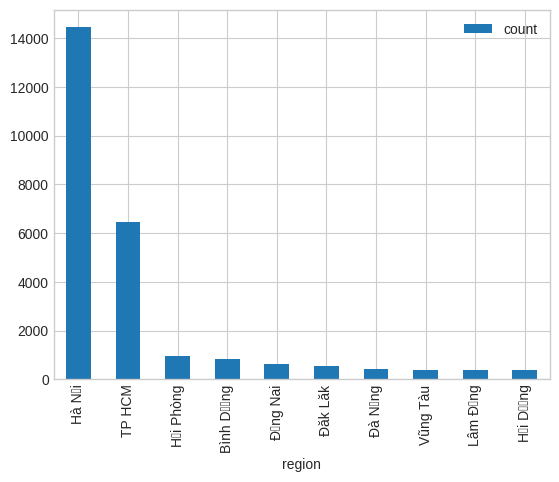

In [ ]:
freq.sort_values(by='count', ascending=False).head(10).plot(kind='bar', x='region', y='count');

As show in plot:
> - Most of sales come from Hà Nội and TP HCM

In [ ]:
# Prepare data for visualization
for i in range(3):
  data = car_details[car_details['brand_grade'] == most_popular[i]]
  region = data.groupby(by='id').max().reset_index()[['region']]
  freq = data.groupby(by='id').count().reset_index()[['id', 'price']]
  freq.rename(columns={'price':'count'}, inplace=True)
  average_price = data.groupby(by='id').mean().reset_index()[['id', 'price']]
  average_price['region'] = region['region']
  average_price['count'] = freq['count']
  average_price = average_price[average_price['count'] >=2]
  # Create choropleth map
  fig = px.choropleth(average_price,
                      locations='id',
                      geojson = vietnam_state,
                      hover_data='count',
                      hover_name='region',
                      color='price',
                      title=most_popular[i])
  fig.update_geos(fitbounds='locations')
  fig.show()

### Relationship between `car_origin` and `price`

In [ ]:
# Extract and preprocessing data
df1 = df[['price', 'brand_grade', 'origin']]
df1['origin'] = rare_label_encoder.fit_transform(np.array(df1['origin']).reshape(-1, 1))
df1 = df1.groupby(by=['brand_grade','origin']).mean()['price'].unstack(level=-1)
df1

origin,Domestic assembly,Imported
brand_grade,,
Ford Everest,932.191011,1000.171875
Ford Ranger,698.877612,706.042857
Kia Morning,274.116667,232.428571
Mazda 3,587.841121,561.375000
Mercedes Benz C class,1152.361842,1264.163934
Mercedes Benz GLC,1814.433526,1803.459459
Toyota Camry,793.335664,787.924528
Toyota Fortuner,783.022222,744.264151
Toyota Innova,547.822785,531.540541


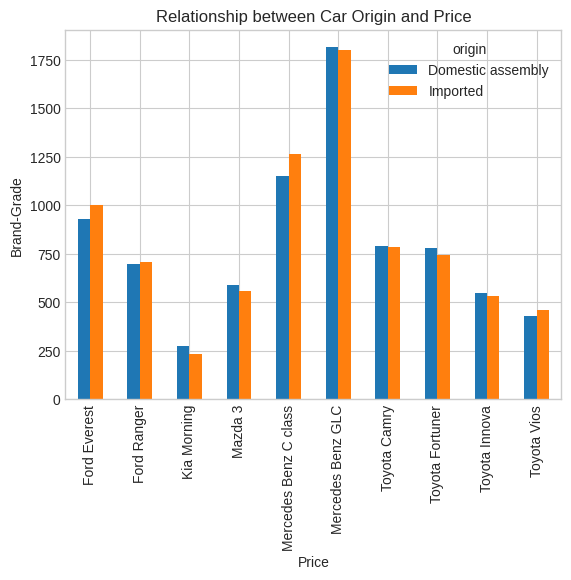

In [ ]:
# Relationship between car_origin and price
ax1 = df1.plot(kind='bar')
ax1.set(title="Relationship between Car Origin and Price",
       ylabel="Brand-Grade",
       xlabel="Price");

### Relationship between `condition` and `price`

In [ ]:
# Extract and preprocessing data
df2 = df[['price', 'brand_grade', 'condition']]
df2['condition'] = rare_label_encoder.fit_transform(np.array(df2['condition']).reshape(-1, 1))
df2 = df2.groupby(by=['brand_grade','condition']).mean()['price'].unstack(level=-1)
df2

condition,New car,Used car
brand_grade,,
Ford Everest,1064.617647,931.461538
Ford Ranger,752.360656,693.420290
Kia Morning,180.666667,263.682353
Mazda 3,609.083333,576.043478
Mercedes Benz C class,1312.812500,1161.674033
Mercedes Benz GLC,1908.660714,1782.554974
Toyota Camry,685.550000,803.954545
Toyota Fortuner,708.450000,789.297297
Toyota Innova,643.628571,498.987654


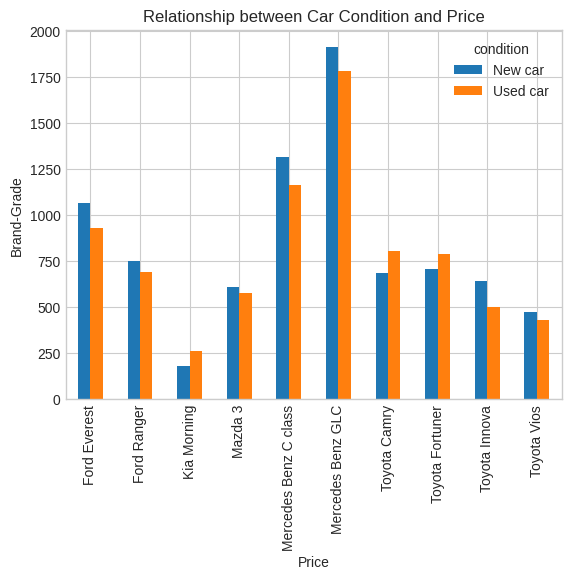

In [ ]:
# Relationship between condition and price
ax2 = df2.plot(kind='bar')
ax2.set(title="Relationship between Car Condition and Price",
       ylabel="Brand-Grade",
       xlabel="Price");

### Relationship between `exterior_color` and `price`

In [ ]:
# Extract and preprocessing data
df3 = df[['price', 'brand_grade', 'exterior_color']]
df3['exterior_color'] = rare_label_encoder.fit_transform(np.array(df3['exterior_color']).reshape(-1, 1))
df3 = df3.groupby(by=['brand_grade','exterior_color']).mean()['price'].unstack(level=-1)
df3

exterior_color,Black,Green,Other,Red,Silver,White
brand_grade,,,,,,
Ford Everest,847.528302,1006.062500,914.851064,1076.833333,1025.930233,948.610169
Ford Ranger,702.010000,712.432432,723.689320,667.857143,677.121212,703.783333
Kia Morning,256.294118,240.375000,275.142857,275.833333,271.294118,245.050000
Mazda 3,566.392857,555.454545,556.913043,598.473684,599.782609,597.685714
Mercedes Benz C class,1271.783784,1291.187500,1152.803922,1087.882353,1134.861111,1186.000000
Mercedes Benz GLC,1789.542373,1759.000000,1764.540000,1996.781250,1590.411765,1910.254237
Toyota Camry,837.300000,848.583333,638.428571,858.200000,746.583333,831.490909
Toyota Fortuner,884.100000,922.250000,704.179487,808.227273,813.866667,715.885714
Toyota Innova,537.782609,531.800000,517.227273,601.466667,574.285714,525.531250


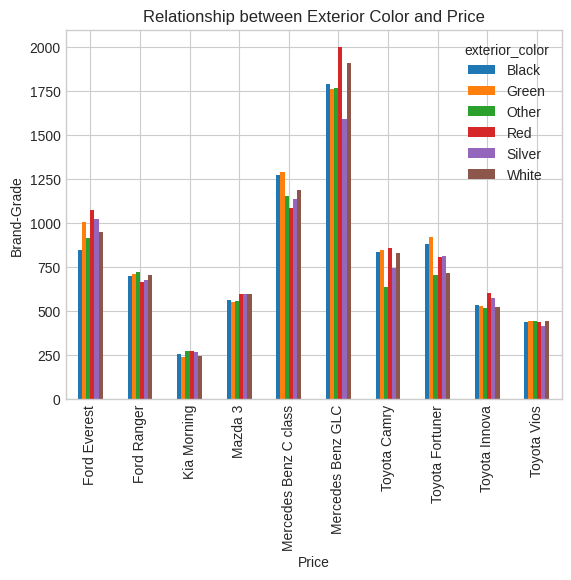

In [ ]:
# Relationship between exterior_color and price
ax3 = df3.plot(kind='bar')
ax3.set(title="Relationship between Exterior Color and Price",
       ylabel="Brand-Grade",
       xlabel="Price");

### Relationship between `interior_color` and `price`

In [ ]:
# Extract and preprocessing data
df4 = df[['price', 'brand_grade', 'interior_color']]
df4['interior_color'] = rare_label_encoder.fit_transform(np.array(df4['interior_color']).reshape(-1, 1))
df4  = df4.groupby(by=['brand_grade','interior_color']).mean()['price'].unstack(level=-1)
df4

interior_color,Black,Brown,Colorful,Cream,Other,gray
brand_grade,,,,,,
Ford Everest,924.304348,1025.571429,1004.153846,890.596154,1152.029412,767.608696
Ford Ranger,698.348485,734.918033,697.689655,690.690000,714.461538,668.942857
Kia Morning,254.285714,236.000000,293.750000,239.176471,281.714286,303.285714
Mazda 3,566.272727,603.923077,598.444444,593.066667,583.714286,584.636364
Mercedes Benz C class,1184.902174,1236.000000,1478.800000,1133.234043,1195.838710,1046.928571
Mercedes Benz GLC,1870.148148,1951.590909,1938.400000,1784.650794,1642.300000,1574.125000
Toyota Camry,813.305882,811.904762,473.800000,771.258621,853.266667,760.416667
Toyota Fortuner,825.752941,649.125000,618.636364,755.063830,638.350000,1057.666667
Toyota Innova,552.240000,543.090909,530.142857,541.000000,483.444444,557.500000


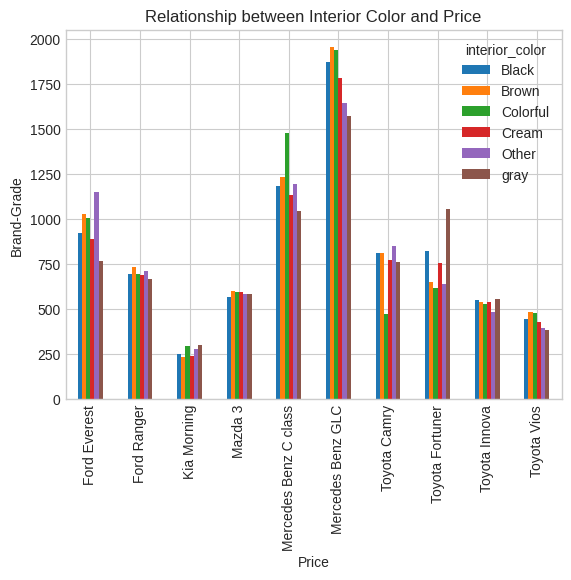

In [ ]:
# Relationship between interior_color and price
ax4 = df4.plot(kind='bar')
ax4.set(title="Relationship between Interior Color and Price",
       ylabel="Brand-Grade",
       xlabel="Price");

### Relationship between `transmission` and `price`

In [ ]:
# Extract and preprocessing data
df5 = df[['price', 'brand_grade', 'transmission']]
df5['transmission'] = rare_label_encoder.fit_transform(np.array(df5['transmission']).reshape(-1, 1))
df5 = df5.groupby(by=['brand_grade','transmission']).mean()['price'].unstack(level=-1)
df5

transmission,Automatic,Manual
brand_grade,,
Ford Everest,951.306358,947.318841
Ford Ranger,703.924581,692.008547
Kia Morning,257.950820,267.407407
Mazda 3,584.435644,574.605263
Mercedes Benz C class,1186.649682,1178.017857
Mercedes Benz GLC,1836.073171,1689.476190
Toyota Camry,796.552632,775.704545
Toyota Fortuner,782.761589,728.567568
Toyota Innova,565.782609,453.875000


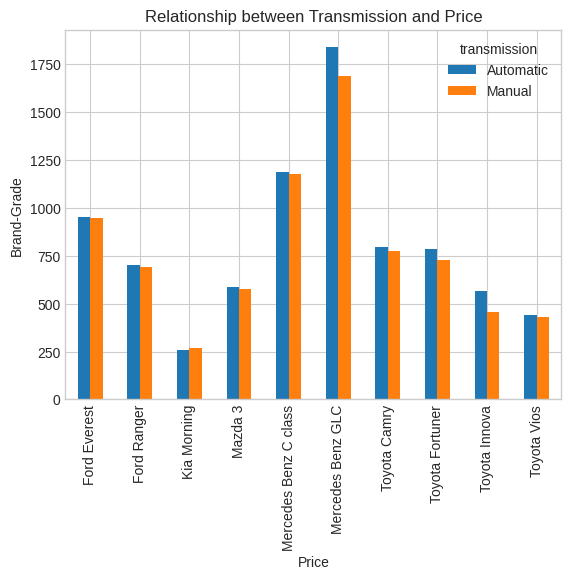

In [ ]:
# Relationship between transmission and price
ax5 = df5.plot(kind='bar')
ax5.set(title="Relationship between Transmission and Price",
       ylabel="Brand-Grade",
       xlabel="Price");

### Relationship between `drive_type` and `price`

In [ ]:
# Extract and preprocessing data
df6 = df[['price', 'brand_grade', 'drive_type']]
df6['drive_type'] = rare_label_encoder.fit_transform(np.array(df6['drive_type']).reshape(-1, 1))
df6 = df6.groupby(by=['brand_grade','drive_type']).mean()['price'].unstack(level=-1)
df6

drive_type,4WD - Four-wheel drive (4WD),AWD - 4-wheel drive (AWD),FWD - Front-wheel drive,Other,RFD - Rear-wheel drive
brand_grade,,,,,
Ford Everest,1174.387097,1015.222222,923.841584,NaN,890.793478
Ford Ranger,686.772727,667.441176,695.345000,667.5,719.919075
Kia Morning,248.833333,233.333333,259.472222,255.0,268.358974
Mazda 3,576.631579,641.307692,574.450000,NaN,576.659574
Mercedes Benz C class,1162.378378,1134.444444,1134.261905,NaN,1250.325301
Mercedes Benz GLC,1767.720930,2070.200000,1768.875000,1859.0,1838.880952
Toyota Camry,704.250000,757.692308,813.746988,1319.0,785.891566
Toyota Fortuner,795.222222,689.733333,769.744681,NaN,789.147541
Toyota Innova,599.333333,683.500000,494.921053,NaN,543.735849


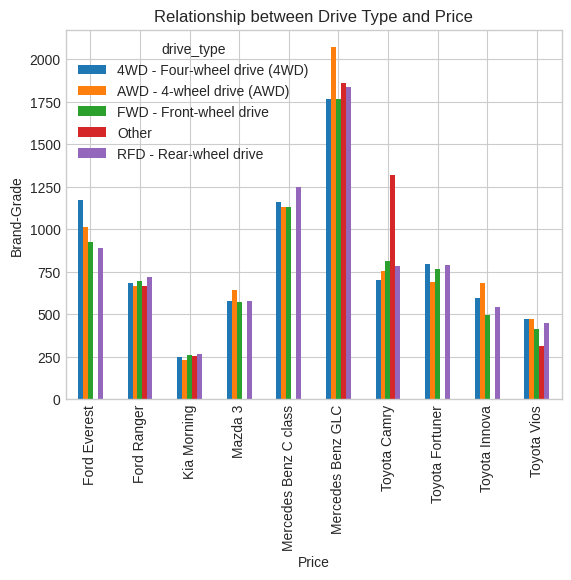

In [ ]:
# Relationship between drive_type and price
ax6 = df6.plot(kind='bar')
ax6.set(title="Relationship between Drive Type and Price",
       ylabel="Brand-Grade",
       xlabel="Price");

### Relationship between `fuel_type` and `price`

In [ ]:
# Extract and preprocessing data
df7 = df[['price', 'brand_grade', 'fuel_type']]
df7['fuel_type'] = rare_label_encoder.fit_transform(np.array(df7['fuel_type']).reshape(-1, 1))
df7 = df7.groupby(by=['brand_grade','fuel_type']).mean()['price'].unstack(level=-1)
df7

fuel_type,Diesel,Hybrid,Other,Petrol
brand_grade,,,,
Ford Everest,1052.360656,1185.0,NaN,914.233333
Ford Ranger,682.721805,800.0,NaN,707.824047
Kia Morning,248.454545,NaN,NaN,264.984848
Mazda 3,583.023810,607.0,NaN,580.652632
Mercedes Benz C class,1255.704225,NaN,NaN,1148.718310
Mercedes Benz GLC,1773.405063,NaN,NaN,1828.892857
Toyota Camry,816.259259,NaN,NaN,782.598592
Toyota Fortuner,799.021277,633.0,NaN,764.992806
Toyota Innova,543.700000,NaN,NaN,542.065789


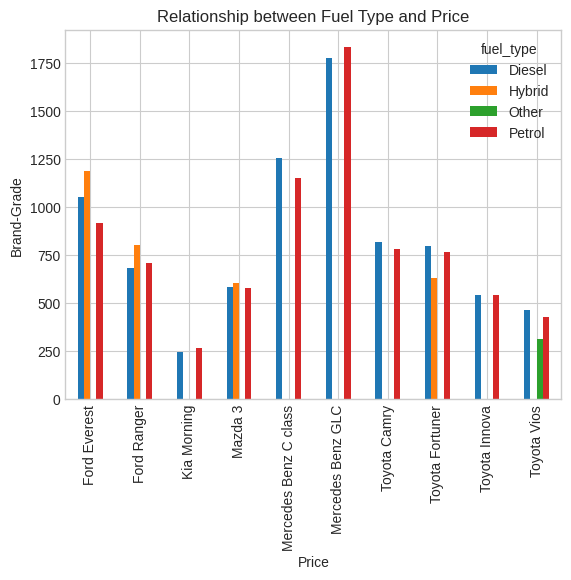

In [ ]:
# Relationship between fuel_type and price
ax7 = df7.plot(kind='bar')
ax7.set(title="Relationship between Fuel Type and Price",
       ylabel="Brand-Grade",
       xlabel="Price");

### Relationship between `engine_size` and `price`

In [ ]:
# Extract and preprocessing data
df8 = df[['price', 'brand_grade', 'engine_size']]
df8['engine_size'] = rare_label_encoder.fit_transform(np.array(df8['engine_size']).reshape(-1, 1))
df8 = df8.groupby(by=['brand_grade','engine_size']).mean()['price'].unstack(level=-1)
df8

engine_size,1.5 L,2.0 L,2.2 L,2.4 L,2.5 L,Other
brand_grade,,,,,,
Ford Everest,967.654545,955.459770,992.315789,1084.100000,694.909091,992.081633
Ford Ranger,714.696970,712.514451,685.428571,633.600000,653.125000,701.218487
Kia Morning,256.705882,256.933333,253.857143,293.500000,163.500000,271.607143
Mazda 3,586.258065,584.829787,602.692308,566.250000,566.384615,573.111111
Mercedes Benz C class,1166.960000,1180.662500,1257.450000,1573.454545,978.062500,1149.055556
Mercedes Benz GLC,1861.784314,1866.892473,1739.812500,1741.285714,1623.500000,1767.441860
Toyota Camry,788.000000,707.100000,1087.071429,820.250000,889.454545,778.400000
Toyota Fortuner,767.420000,791.466667,821.733333,664.222222,821.777778,727.750000
Toyota Innova,532.190476,574.750000,517.571429,472.583333,573.714286,517.666667


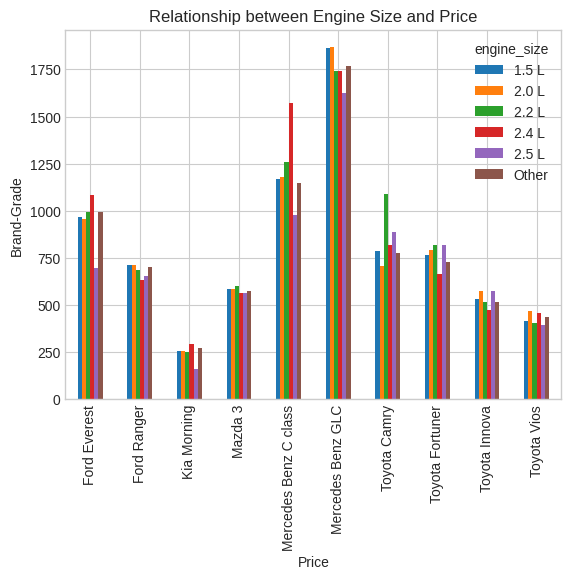

In [ ]:
# Relationship between engine_size and price
ax8 = df8.plot(kind='bar')
ax8.set(title="Relationship between Engine Size and Price",
       ylabel="Brand-Grade",
       xlabel="Price");

### Relationship between `fuel_consumption` and `price`

In [ ]:
# Extract and preprocessing data
df9 = df[['price', 'brand_grade', 'fuel_consumption']]
df9['fuel_consumption'] = rare_label_encoder.fit_transform(np.array(df9['fuel_consumption']).reshape(-1, 1))
df9 = df9.groupby(by=['brand_grade','fuel_consumption']).mean()['price'].unstack(level=-1)
df9

fuel_consumption,5.0,6.0,7.0,8.0,None,Other
brand_grade,,,,,,
Ford Everest,1079.266667,844.842105,995.500000,950.166667,946.653333,934.450000
Ford Ranger,751.750000,688.621622,675.458333,726.864865,703.200680,683.860465
Kia Morning,314.000000,278.833333,292.333333,197.600000,259.206349,253.600000
Mazda 3,546.571429,532.300000,571.200000,592.368421,590.246753,585.636364
Mercedes Benz C class,1241.500000,1202.888889,1295.736842,1285.083333,1150.571429,1226.750000
Mercedes Benz GLC,1874.000000,1724.560000,1895.750000,1705.500000,1820.887417,1726.583333
Toyota Camry,806.000000,1014.950000,728.666667,573.454545,822.879630,656.083333
Toyota Fortuner,890.454545,732.062500,741.750000,747.333333,778.956897,714.285714
Toyota Innova,585.000000,599.125000,521.214286,521.166667,534.328767,632.142857


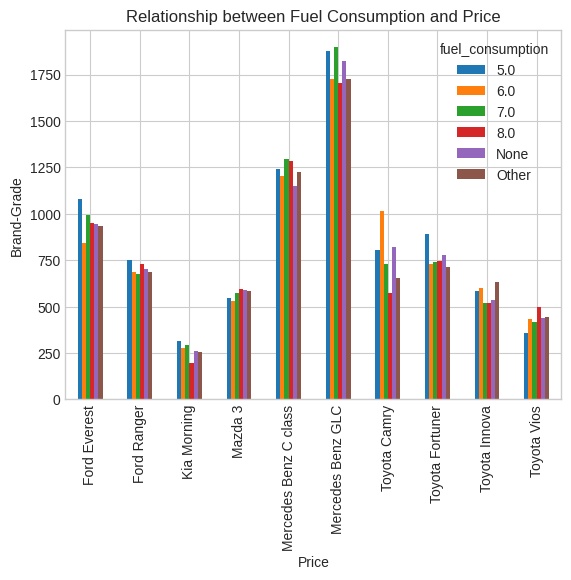

In [ ]:
# Relationship between fuel_consumption and price
ax9 = df9.plot(kind='bar')
ax9.set(title="Relationship between Fuel Consumption and Price",
       ylabel="Brand-Grade",
       xlabel="Price");

### Relationship between `year_of_manufacture` and `price`

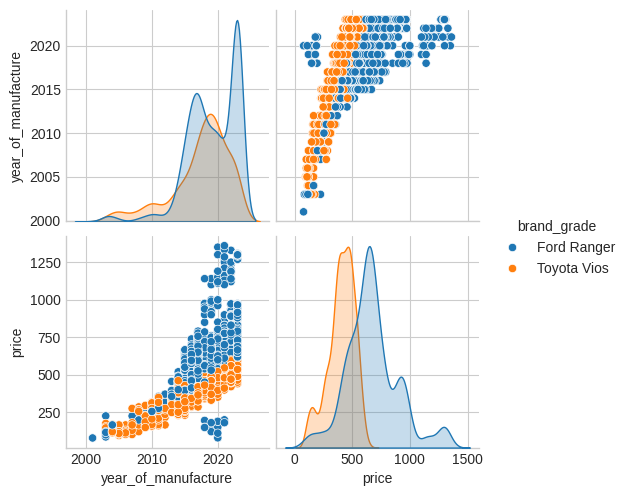

In [ ]:
# Relationship between year_of_manufacture and price
rank = 2
most_popular = car_details['brand_grade'].value_counts()[:rank].index.tolist()
df = car_details[car_details['brand_grade'].isin(most_popular)]

sns.pairplot(df[['brand_grade', 'year_of_manufacture', 'price']],
             hue="brand_grade");

### Relationship betweeen `mileage` and `price`

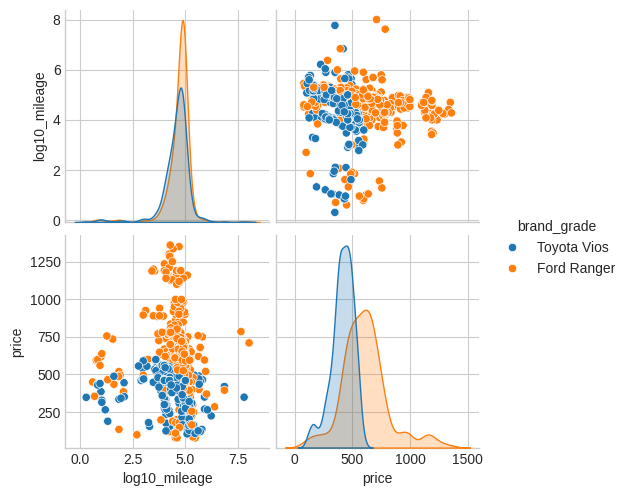

In [ ]:
# Relationship between mileage and price
# discretiser = EqualWidthDiscretiser(bins=20)
rank = 2
most_popular = car_details['brand_grade'].value_counts()[:rank].index.tolist()
df = car_details[car_details['brand_grade'].isin(most_popular)]

sns.pairplot(df[(df['log10_mileage']!=0)][['brand_grade', 'log10_mileage', 'price']],
             hue="brand_grade",
             vars=["log10_mileage", 'price']);

# **4. Data Transformation**

In [ ]:
%%time
# Prepare Data
selected_cols = ['log10_price', 'origin', 'condition', 'car_model',
                 'log10_mileage','exterior_color', 'interior_color',
                 'num_of_doors', 'seating_capacity','fuel_type',
                 'engine_size', 'transmission','drive_type',
                 'fuel_consumption', 'brand_grade', 'year_of_manufacture']
car_details = car_details[selected_cols]

# Discretisation
discretiser = EqualWidthDiscretiser(bins=10, return_object=True)
car_details['log10_mileage'] = discretiser.fit_transform(np.array(car_details['log10_mileage']).reshape(-1,1))

# Select main label
main_label='log10_price'

# Set up a rare label encoder for selected columns.
for col in car_details.columns:
    if (col != main_label) & (col != 'brand_grade'):
        car_details[col] = car_details[col].fillna('None').astype(str)
        encoder = RareLabelEncoder( n_categories=1,
                                    max_n_categories=150,
                                    replace_with='Other',
                                    tol= 50.0 / df.shape[0])
        car_details[col] = encoder.fit_transform(car_details[[col]])
    elif col == 'brand_grade':
      car_details[col] = car_details[col].fillna('None').astype(str)
      encoder = RareLabelEncoder(  n_categories=1,
                                    max_n_categories=150,
                                    replace_with='Other',
                                    tol= 5.0 / df.shape[0])
      car_details[col] = encoder.fit_transform(car_details[[col]])

print(car_details.shape)  # Print the shape of the resulting DataFrame.
car_details.sample(10).T  # Display a sample of 10 rows, transposed for easier readability.

(30417, 16)
CPU times: user 1.1 s, sys: 15.2 ms, total: 1.11 s
Wall time: 1.61 s


,25788,17547,8825,10478,7210,30322,22098,14755,10061,17554
log10_price,2.685742,2.352183,2.982271,2.469822,3.072985,2.913814,2.332438,2.972666,2.274158,2.414973
origin,Imported,Imported,Domestic assembly,Domestic assembly,Domestic assembly,Imported,Domestic assembly,Imported,Domestic assembly,Domestic assembly
condition,Used car,Used car,Used car,Used car,New car,Used car,Used car,Used car,Used car,Used car
car_model,SUV,Hatchback,SUV,Crossover,Crossover,SUV,Crossover,Bán tải / Pickup,Other,Crossover
log10_mileage,5,4,4,0,0,4,4,4,0,0
exterior_color,Grey,White,White,Silver,Grey,White,Silver,Black,White,Silver
interior_color,Colorful,gray,Black,Black,Cream,Black,Cream,Black,gray,Black
num_of_doors,5,5,5,5,5,5,5,4,2,5
seating_capacity,5,5,7,7,5,7,8,5,Other,7
fuel_type,Petrol,Petrol,Diesel,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Petrol


In [ ]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30417 entries, 0 to 30416
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   log10_price          30417 non-null  float64
 1   origin               30417 non-null  object 
 2   condition            30417 non-null  object 
 3   car_model            30417 non-null  object 
 4   log10_mileage        30417 non-null  object 
 5   exterior_color       30417 non-null  object 
 6   interior_color       30417 non-null  object 
 7   num_of_doors         30417 non-null  object 
 8   seating_capacity     30417 non-null  object 
 9   fuel_type            30417 non-null  object 
 10  engine_size          30417 non-null  object 
 11  transmission         30417 non-null  object 
 12  drive_type           30417 non-null  object 
 13  fuel_consumption     30417 non-null  object 
 14  brand_grade          30417 non-null  object 
 15  year_of_manufacture  30417 non-null 

# **5. Machine Learning**

## CatBoostRegressor

### Overview

In [ ]:
%%time
# Initialize data
# Extract the values of the 'main_label' column and reshape it into a 1D array as 'y'
y = car_details[main_label].values.reshape(-1,)

# Create the feature matrix 'X' by dropping the 'main_label' column from the DataFrame 'df'
X = car_details.drop([main_label], axis=1)

# Identify categorical columns in the DataFrame 'car_details'
# These columns contain non-numeric data
categorical_cols = car_details.select_dtypes(include=['object']).columns

# Create a list of indices for categorical columns in the feature matrix 'X'
categorical_cols_idx = [list(X.columns).index(c) for c in categorical_cols]

# Split the data into training and testing sets
# - 'X_train' and 'y_train' will contain the training features and labels, respectively
# - 'X_test' and 'y_test' will contain the testing features and labels, respectively
# The split is done with a 30% test size, a random seed of 0, and stratification based on the selected column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=car_details[['brand_grade']])

# Print the dimensions of the training and testing sets
# This provides insight into the sizes of the datasets
print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}, y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}")

# Initialize the training and testing data pools using CatBoost's Pool class
train_pool = Pool(X_train,
                  y_train,
                  cat_features=categorical_cols_idx)  # Create a training data pool with categorical features
test_pool = Pool(X_test,
                 y_test,
                 cat_features=categorical_cols_idx)  # Create a testing data pool with categorical features
# Specify the training parameters for the CatBoostRegressor model
cat_boost_regressor = CatBoostRegressor(iterations=300,    # Number of boosting iterations
                          depth=8,                  # Maximum depth of trees in the ensemble
                          verbose=0,                # Set verbosity level to 0 (no output during training)
                          learning_rate=0.1,        # Learning rate for gradient boosting
                          early_stopping_rounds=10, # Early stopping rounds
                          loss_function='RMSE',     # Loss function to optimize (Root Mean Squared Error)
                          task_type="GPU")          # Train on GPU

# Train the CatBoostRegressor model on the training data
start = time.time()
cat_boost_regressor.fit(train_pool, eval_set=test_pool)
end = time.time()
train_time_pretrain = round(end-start,4)
print(f"Training time: {train_time_pretrain}s")

# Make predictions using the trained model on both the training and testing data
start = time.time()
y_train_pred = cat_boost_regressor.predict(train_pool)  # Predictions on the training data
y_test_pred = cat_boost_regressor.predict(test_pool)    # Predictions on the testing data
end = time.time()
predict_time_pretrain = round(end-start,4)
print(f"Predicting time: {predict_time_pretrain}")

# Calculate and print the Root Mean Squared Error (RMSE) scores for training and testing data
rmse_train_catboost_pretrain = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
rmse_test_catboost_pretrain = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data

# Print the rounded RMSE scores
print('\nEvaluation results:')
print(f"RMSE score {round(rmse_train_catboost_pretrain, 4)} ({round((10**rmse_train_catboost_pretrain),2)} triệu VNĐ) for train dex")
print(f"RMSE score {round(rmse_test_catboost_pretrain, 4)} ({round((10**rmse_test_catboost_pretrain),2)} triệu VNĐ) for test dex\n")

X_train.shape: (21291, 15), X_test.shape: (9126, 15), y_train.shape: (21291,), y_test.shape: (9126,)
Training time: 11.4178s
Predicting time: 0.503

Evaluation results:
RMSE score 0.1574 (1.44 triệu VNĐ) for train dex
RMSE score 0.1774 (1.5 triệu VNĐ) for test dex

CPU times: user 11 s, sys: 3.44 s, total: 14.5 s
Wall time: 12.4 s


### Feature Engineering

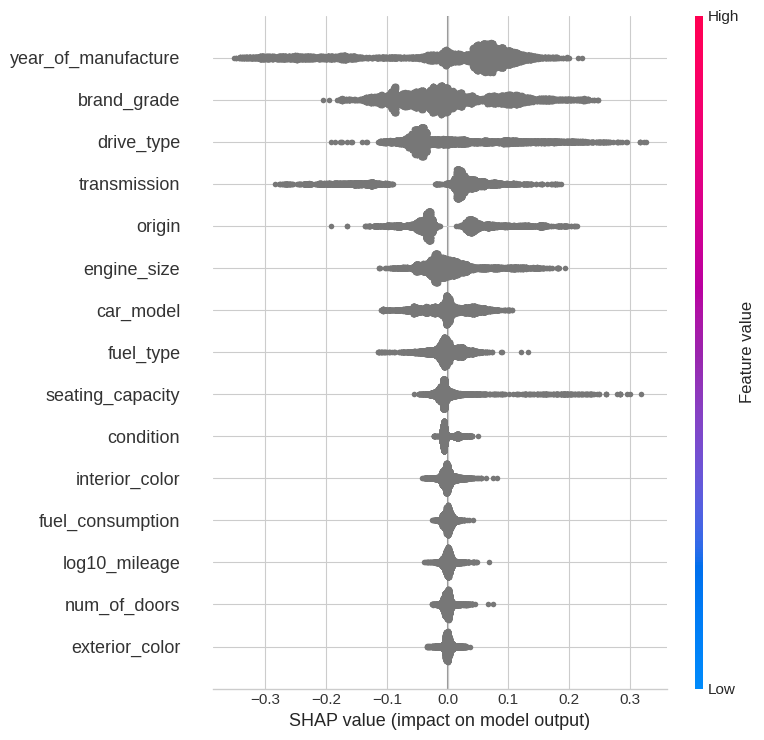

CPU times: user 15.3 s, sys: 791 ms, total: 16.1 s
Wall time: 13.9 s


In [ ]:
%%time
# Initialize data
# Extract the values of the 'main_label' column and reshape it into a 1D array as 'y'
y = car_details[main_label].values.reshape(-1,)

# Create the feature matrix 'X' by dropping the 'main_label' column from the DataFrame 'df'
X = car_details.drop([main_label], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=car_details[['brand_grade']])

# Initialize the SHAP library for visualization
shap.initjs()

# Create a Explainer object for the 'model' (assumes 'model' is a tree-based model like a Random Forest or XGBoost)
ex = shap.TreeExplainer(cat_boost_regressor)

# Calculate SHAP values for the 'X_test' data using the TreeExplainer
shap_values = ex.shap_values(X_test)

# Generate a summary plot to visualize the impact of features on model predictions
shap.summary_plot(shap_values, X_test)

Important features:
- year_of_manufacture
- drive_type
- origin
- brand_grade
- transmission
- engine_size
- car_model
- fuel_type
- seating_capacity

In [ ]:
%%time
# Initialize data
# Extract the values of the 'main_label' column and reshape it into a 1D array as 'y'
y = car_details[main_label].values.reshape(-1,)

# Create the feature matrix 'X' by dropping the 'main_label' and not important columns from the DataFrame 'car_details'
X = car_details.drop([main_label, 'interior_color', 'condition',
                      'log10_mileage', 'fuel_consumption',
                      'num_of_doors', 'exterior_color'], axis=1)

# Identify categorical columns in the DataFrame 'car_details'
# These columns contain non-numeric data
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a list of indices for categorical columns in the feature matrix 'X'
categorical_cols_idx = [list(X.columns).index(c) for c in categorical_cols]

# Split the data into training and testing sets
# - 'X_train' and 'y_train' will contain the training features and labels, respectively
# - 'X_test' and 'y_test' will contain the testing features and labels, respectively
# The split is done with a 30% test size, a random seed of 0, and stratification based on the selected column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=car_details[['brand_grade']])

# Print the dimensions of the training and testing sets
# This provides insight into the sizes of the datasets
print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}, y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}")

# Initialize the training and testing data pools using CatBoost's Pool class
train_pool = Pool(X_train,
                  y_train,
                  cat_features=categorical_cols_idx)  # Create a training data pool with categorical features
test_pool = Pool(X_test,
                 y_test,
                 cat_features=categorical_cols_idx)  # Create a testing data pool with categorical features
# Specify the training parameters for the CatBoostRegressor model
cat_boost_regressor = CatBoostRegressor(iterations=300,    # Number of boosting iterations
                          depth=8,                  # Maximum depth of trees in the ensemble
                          verbose=0,                # Set verbosity level to 0 (no output during training)
                          learning_rate=0.1,        # Learning rate for gradient boosting
                          early_stopping_rounds=10, # Early stopping rounds
                          loss_function='RMSE',     # Loss function to optimize (Root Mean Squared Error)
                          task_type="GPU")          # Train on GPU

# Train the CatBoostRegressor model on the training data
start = time.time()
cat_boost_regressor.fit(train_pool, eval_set=test_pool)
end = time.time()
train_time_optimized = round(end-start,4)
print(f"Training time: {round(train_time_optimized)}s")

# Make predictions using the trained model on both the training and testing data
start = time.time()
y_train_pred = cat_boost_regressor.predict(train_pool)  # Predictions on the training data
y_test_pred = cat_boost_regressor.predict(test_pool)    # Predictions on the testing data
end = time.time()
predict_time_optimized = round(end-start,4)
print(f"Predicting time: {predict_time_optimized}s")

# Calculate and print the Root Mean Squared Error (RMSE) scores for training and testing data
rmse_train_catboost_optimized = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
rmse_test_catboost_optimized = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data

# Print the rounded RMSE scores
print('\nEvaluation results on test set:')
print(f"RMSE score {round(rmse_train_catboost_optimized, 4)} ({round((10**rmse_train_catboost_optimized),2)} triệu VNĐ) for train dex")
print(f"RMSE score {round(rmse_test_catboost_optimized, 4)} ({round((10**rmse_test_catboost_optimized),2)} triệu VNĐ) for test dex\n")

X_train.shape: (21291, 9), X_test.shape: (9126, 9), y_train.shape: (21291,), y_test.shape: (9126,)
Training time: 8s
Predicting time: 0.1773s

Evaluation results on test set:
RMSE score 0.1591 (1.44 triệu VNĐ) for train dex
RMSE score 0.1759 (1.5 triệu VNĐ) for test dex

CPU times: user 9.06 s, sys: 2.95 s, total: 12 s
Wall time: 8.82 s


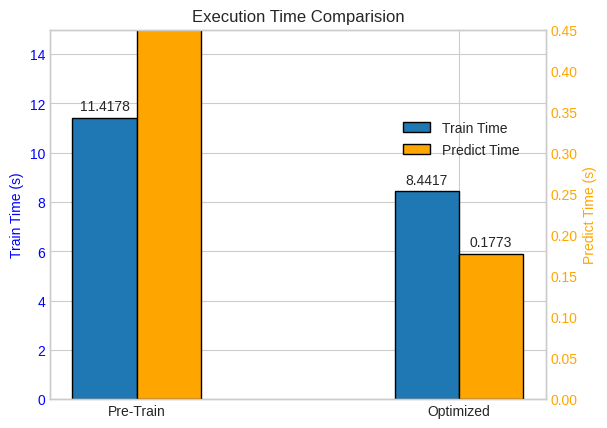

In [ ]:
# Initialize Data for Visualization
train_time = [train_time_pretrain, train_time_optimized]
predict_time = [predict_time_pretrain, predict_time_optimized]
rmse_train_catboost = [rmse_train_catboost_pretrain, rmse_train_catboost_optimized]
rmse_test_catboost = [rmse_test_catboost_pretrain, rmse_test_catboost_optimized]
# Visualization
fig, ax1 = plt.subplots()
X = ["Pre-Train", "Optimized"]
X_axis = np.arange(len(X))
plt.xticks(X_axis, X)
# Axes 1
color1="Blue"
rect1 = ax1.bar(X_axis-0.1, train_time, 0.2 , label="Train Time", edgecolor='black')
ax1.set_ylim(0, 15)
ax1.set_ylabel('Train Time (s)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title("Execution Time Comparision")
ax1.bar_label(rect1, padding=3)
# Axes 2
color2="Orange"
ax2 = ax1.twinx()
rect2 = ax2.bar(X_axis+0.1, predict_time, 0.2, label="Predict Time", color='orange', edgecolor='black')
ax2.set_ylim(0, 0.45)
ax2.grid(False)
ax2.set_ylabel('Predict Time (s)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.bar_label(rect2, padding=3)
# Legend
ax1.legend(loc=(0.7,0.7))
ax2.legend(loc=(0.7,0.64))
plt.show();

### Parameters Tuning

CatBoostRegressor parameters

- iterations : Number of boosting iterations

- depth : Maximum depth of trees in the ensemble
  
- learning_rate : Learning rate for gradient boosting

- early_stopping_rounds : Early stopping rounds


#### `iterations`

In [ ]:
%%time
# iterations
iterations , iterations_train_rmse, iterations_test_rmse , iterations_execution_time = [] , [] , [], []
for i in range(1, 501, 20):
  iterations.append(i)
  # Specify the training parameters for the CatBoostRegressor model
  cat_boost_regressor = CatBoostRegressor(iterations=i,    # Number of boosting iterations
                          depth=6,           # Maximum depth of trees in the ensemble
                          verbose=0,         # Set verbosity level to 0 (no output during training)
                          learning_rate=0.1,          # Learning rate for gradient boosting
                          early_stopping_rounds=10,   # Early stopping rounds
                          loss_function='RMSE',  # Loss function to optimize (Root Mean Squared Error)
                          task_type="GPU")       # Train on GPU

  # Train the CatBoostRegressor model on the training data
  start = time.time()
  cat_boost_regressor.fit(train_pool, eval_set=test_pool)
  end = time.time()
  iterations_execution_time.append(end-start)

  # Make predictions using the trained model on both the training and testing data
  y_train_pred = cat_boost_regressor.predict(train_pool)  # Predictions on the training data
  y_test_pred = cat_boost_regressor.predict(test_pool)    # Predictions on the testing data

  # Calculate accuracy scores for training and testing data
  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data
  iterations_train_rmse.append(rmse_train)
  iterations_test_rmse.append(rmse_test)

CPU times: user 1min 56s, sys: 37.1 s, total: 2min 33s
Wall time: 1min 55s


In [ ]:
# Create a function to scale number from range (from_min, from_max) to (to_min, to_max)
def scale_number(unscaled, to_min, to_max, from_min, from_max):
    return (to_max-to_min)*(unscaled-from_min)/(from_max-from_min)+to_min
# Create a function to scale a list from range (from_min, from_max) to (to_min, to_max)
def scale_list(l, to_min, to_max):
    return [scale_number(i, to_min, to_max, min(l), max(l)) for i in l]

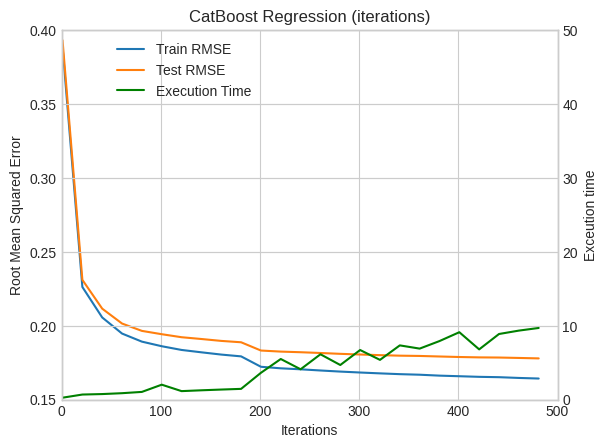

In [ ]:
# Initialize fig, ax instances
fig , ax1 = plt.subplots()
# Axes 1
line1 = ax1.plot(iterations, iterations_train_rmse, label="Train RMSE");
line2 = ax1.plot(iterations, iterations_test_rmse, label="Test RMSE");
ax1.set_ylabel("Root Mean Squared Error")
ax1.set_xlabel("Iterations")
ax1.set_xlim((0,500))
ax1.set_ylim((0.15, 0.4))
ax1.set_title("CatBoost Regression (iterations)")

# Axes 2
ax2 = ax1.twinx()
line3 = ax2.plot(iterations, iterations_execution_time, label="Execution Time", color='green')
ax2.set_ylabel("Exceution time")
ax2.set_ylim((0, 50))

# Legend
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=(0.1,0.8))
plt.show();

#### `depth`

In [ ]:
%%time
# Depth
cat_depth , depth_train_rmse, depth_test_rmse , depth_execution_time = [] , [] , [], []
for d in range(1, 17, 1):
  cat_depth.append(d)
  # Specify the training parameters for the CatBoostRegressor model
  cat_boost_regressor = CatBoostRegressor(iterations=200,    # Number of boosting iterations
                          depth=d,           # Maximum depth of trees in the ensemble
                          verbose=0,         # Set verbosity level to 0 (no output during training)
                          learning_rate=0.1,  # Learning rate for gradient boosting
                          early_stopping_rounds=10, # Early stopping rounds
                          loss_function='RMSE', # Loss function to optimize (Root Mean Squared Error)
                          task_type="GPU")      # Train on GPU

  # Train the CatBoostRegressor model on the training data
  start = time.time()
  cat_boost_regressor.fit(train_pool, eval_set=test_pool)
  end = time.time()
  depth_execution_time.append(end-start)

  # Make predictions using the trained model on both the training and testing data
  y_train_pred = cat_boost_regressor.predict(train_pool)  # Predictions on the training data
  y_test_pred = cat_boost_regressor.predict(test_pool)    # Predictions on the testing data

  # Calculate accuracy scores for training and testing data
  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data
  depth_train_rmse.append(rmse_train)
  depth_test_rmse.append(rmse_test)

CPU times: user 3min 45s, sys: 49.6 s, total: 4min 34s
Wall time: 3min 39s


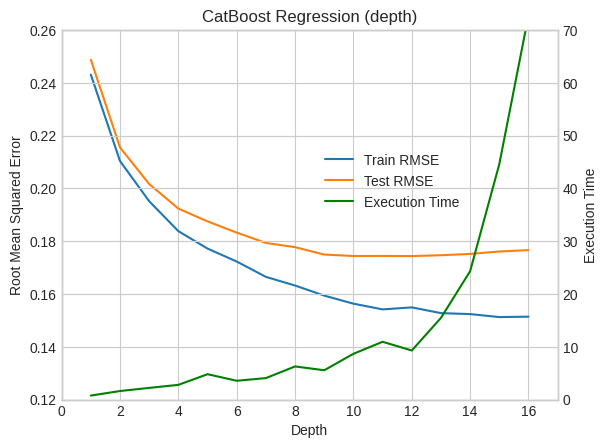

In [ ]:
# Intialize fig, ax instances
fig , ax1 = plt.subplots()
# Axes 1
line1 = ax1.plot(cat_depth, depth_train_rmse, label="Train RMSE");
line2 = ax1.plot(cat_depth, depth_test_rmse, label="Test RMSE");
ax1.set_ylim((0.12, 0.26))
ax1.set_xlim((0, 17))
ax1.set_ylabel("Root Mean Squared Error")
ax1.set_title("CatBoost Regression (depth)")
ax1.set_xlabel("Depth")

# Axes 2
ax2 = ax1.twinx()
line3 = ax2.plot(cat_depth, depth_execution_time, label="Execution Time", color='green')
ax2.set_ylim(0, 70)
ax2.set_label("Execution Time")
ax2.set_ylabel("Execution Time")
# ax2.vlines(x=8, ymin=0, ymax=700, linestyles="dashed", colors='red')

# Legend
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=(0.52,0.5))
plt.show();

#### `learning_rate`

In [ ]:
%%time
# Learning Rate
learning_rate , learning_rate_train_rmse, learning_rate_test_rmse , learning_rate_execution_time = [] , [] , [], []
for lr in range(1, 21, 1):
  learning_rate.append(lr/100)
  # Specify the training parameters for the CatBoostRegressor model
  cat_boost_regressor = CatBoostRegressor(iterations=200,    # Number of boosting iterations
                          depth=8,           # Maximum depth of trees in the ensemble
                          verbose=0,         # Set verbosity level to 0 (no output during training)
                          learning_rate=lr/100,  # Learning rate for gradient boosting
                          early_stopping_rounds=10, # Early stopping rounds
                          loss_function='RMSE',  # Loss function to optimize (Root Mean Squared Error)
                          task_type="GPU")       # Train on GPU

  # Train the CatBoostRegressor model on the training data
  start = time.time()
  cat_boost_regressor.fit(train_pool, eval_set=test_pool)
  end = time.time()
  learning_rate_execution_time.append(end-start)

  # Make predictions using the trained model on both the training and testing data
  y_train_pred = cat_boost_regressor.predict(train_pool)  # Predictions on the training data
  y_test_pred = cat_boost_regressor.predict(test_pool)    # Predictions on the testing data

  # Calculate accuracy scores for training and testing data
  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data
  learning_rate_train_rmse.append(rmse_train)
  learning_rate_test_rmse.append(rmse_test)

CPU times: user 1min 52s, sys: 35.6 s, total: 2min 28s
Wall time: 1min 48s


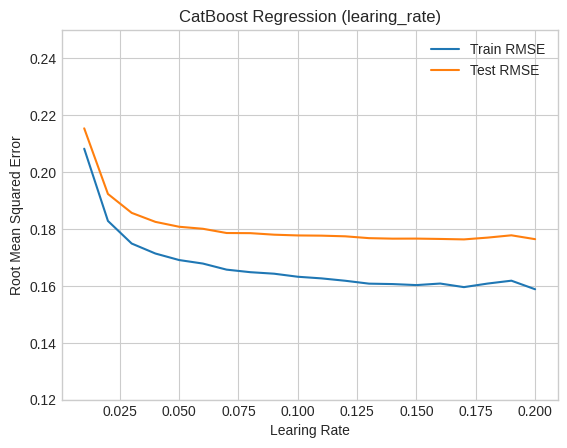

In [ ]:
plt.figure()
plt.plot(learning_rate, learning_rate_train_rmse, label="Train RMSE");
plt.plot(learning_rate, learning_rate_test_rmse, label="Test RMSE");
# plt.plot(learning_rate, scale_list(learning_rate_execution_time, 0.13, 0.24), label="Execution Time")
# plt.vlines(x=8, ymin=0.12, ymax=0.25, linestyles="dashed", colors='red')
plt.xlabel("Learing Rate")
plt.ylabel("Root Mean Squared Error")
plt.ylim((0.12,0.25))
plt.title("CatBoost Regression (learing_rate)")
plt.legend()
plt.show();

## XGBoost

### Overview

In [ ]:
%%time
# Initialize Data
# Create a copy of DataFrame to apply modification
encoded_car_details = car_details.copy()

# Identify categorical columns in the DataFrame 'car_details'. These columns contain non-numeric data
categorical_cols = encoded_car_details.select_dtypes(include=['object']).columns

# Instantiate LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder on Categorical Feature columns
encoded_car_details[categorical_cols] = encoded_car_details[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Split the data into training and testing sets
# The split is done with a 30% test size, a random seed of 0, and stratification based on the selected column
train, test = train_test_split(encoded_car_details, test_size=0.3, random_state=0)

# 'X_train' and 'y_train' will contain the training features and labels, respectively
X_train = train.drop('log10_price',axis=1)
y_train = train['log10_price']

# 'X_test' and 'y_test' will contain the testing features and labels, respectively
X_test = test.drop('log10_price',axis=1)
y_test = test['log10_price']

# Print the dimensions of the training and testing sets. This provides insight into the sizes of the datasets
print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}, y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}")

# Initialize XGBoostRegressor Object
xg_reg = xgb.XGBRegressor(seed=0, # Random seed
                          learning_rate=0.025,    # Learning rate for gradient boosting
                          n_estimators=1000,       # Number of boosting iterations
                          max_depth=10,            # Maximum depth of trees in the ensemble
                          tree_method="gpu_hist", # Train on GPU
                          device='cuda')          # Specify calculating device as CUDA (Compute Unified Device Architecture)

# Train the XGBoostRegressor model on training data
start = time.time()
xg_reg.fit(X_train, y_train)
end = time.time()
xgb_train_time_pretrain = round(end-start, 4)
print(f'Training time: {xgb_train_time_pretrain}s')

# Make predictions using the trained model on both the training and testing data
start = time.time()
y_train_pred = xg_reg.predict(X_train) # Predictions on the training data
y_test_pred = xg_reg.predict(X_test)   # Predictions on the testing data
end = time.time()
xgb_predict_time_pretrain = round(end-start, 4)
print(f'Predicting time: {xgb_predict_time_pretrain}s')

# Calculate and print the Root Mean Squared Error (RMSE) scores for training and testing data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data

# Print the rounded RMSE scores
print('\nEvaluation results on test set:')
print(f"RMSE score {round(rmse_train, 4)} ({round((10**rmse_train),2)} triệu VNĐ) for train dex")
print(f"RMSE score {round(rmse_test, 4)} ({round((10**rmse_test),2)} triệu VNĐ) for test dex\n")

X_train.shape: (21291, 15), X_test.shape: (9126, 15), y_train.shape: (21291,), y_test.shape: (9126,)
Training time: 7.2983s
Predicting time: 0.1169s

Evaluation results on test set:
RMSE score 0.086 (1.22 triệu VNĐ) for train dex
RMSE score 0.1736 (1.49 triệu VNĐ) for test dex

CPU times: user 7.86 s, sys: 220 ms, total: 8.08 s
Wall time: 7.63 s


### Feature Engineering

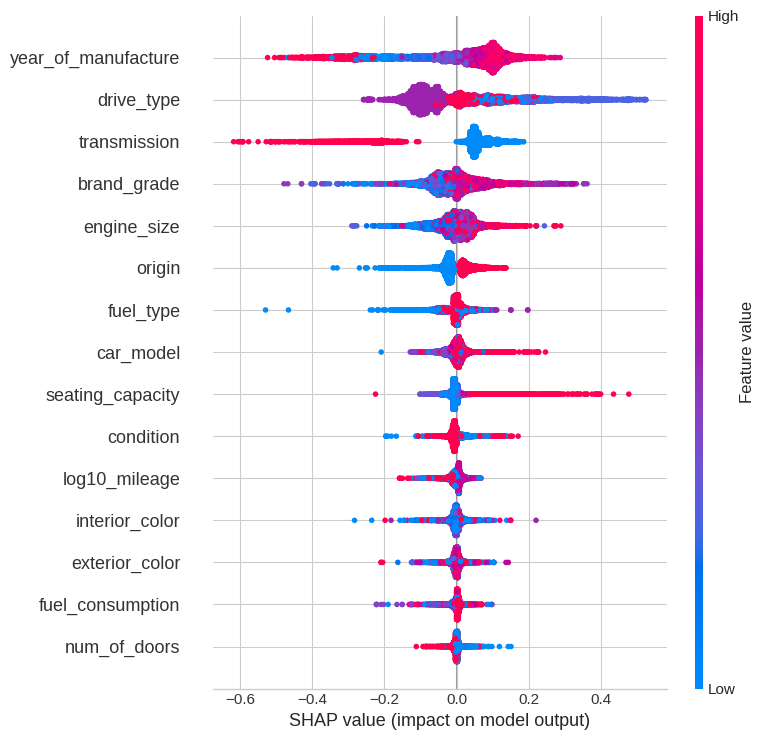

CPU times: user 12.2 s, sys: 1.1 s, total: 13.3 s
Wall time: 12.9 s


In [ ]:
%%time
# Initialize Data
# Create a copy of DataFrame to apply modification
encoded_car_details = car_details.copy()

# Identify categorical columns in the DataFrame 'car_details'. These columns contain non-numeric data
categorical_cols = encoded_car_details.select_dtypes(include=['object']).columns

# Instantiate LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder on Categorical Feature columns
encoded_car_details[categorical_cols] = encoded_car_details[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Split the data into training and testing sets
# The split is done with a 30% test size, a random seed of 0, and stratification based on the selected column
train, test = train_test_split(encoded_car_details, test_size=0.3, random_state=0)

# 'X_train' and 'y_train' will contain the training features and labels, respectively
X_train = train.drop('log10_price',axis=1)
y_train = train['log10_price']

# 'X_test' and 'y_test' will contain the testing features and labels, respectively
X_test = test.drop('log10_price',axis=1)
y_test = test['log10_price']

# Initialize the SHAP library for visualization
shap.initjs()

# Create a TreeExplainer object for the 'model' (assumes 'model' is a tree-based model like a Random Forest or XGBoost)
ex = shap.TreeExplainer(xg_reg)

# Calculate SHAP values for the 'X_test' data using the TreeExplainer
shap_values = ex.shap_values(X_test)

# Generate a summary plot to visualize the impact of features on model predictions
shap.summary_plot(shap_values, X_test)

Important features:
- year_of_manufacture
- drive_type
- transmission
- brand_grade
- engine_size
- origin
- fuel_type
- car_model
- seating_capacity

In [ ]:
%%time
# Initialize Data
# Create a copy of DataFrame to apply modification
encoded_car_details = car_details.copy()

# Identify categorical columns in the DataFrame 'car_details'. These columns contain non-numeric data
categorical_cols = encoded_car_details.select_dtypes(include=['object']).columns

# Instantiate LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder on Categorical Feature columns
encoded_car_details[categorical_cols] = encoded_car_details[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Split the data into training and testing sets
# The split is done with a 30% test size, a random seed of 0, and stratification based on the selected column
train, test = train_test_split(encoded_car_details, test_size=0.3, random_state=0)

# 'X_train' and 'y_train' will contain the training features and labels, respectively
X_train = train[['year_of_manufacture', 'drive_type', 'transmission',
                'brand_grade', 'engine_size', 'origin', 'fuel_type',
                'car_model', 'seating_capacity']]
y_train = train['log10_price']

# 'X_test' and 'y_test' will contain the testing features and labels, respectively
X_test = test[['year_of_manufacture', 'drive_type', 'transmission',
                'brand_grade', 'engine_size', 'origin', 'fuel_type',
                'car_model', 'seating_capacity']]
y_test = test['log10_price']

# Print the dimensions of the training and testing sets. This provides insight into the sizes of the datasets
print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}, y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}")

# Initialize XGBoostRegressor Object
xg_reg = xgb.XGBRegressor(seed=0, # Random seed
                          learning_rate=0.025,    # Learning rate for gradient boosting
                          n_estimators=1000,       # Number of boosting iterations
                          max_depth=10,            # Maximum depth of trees in the ensemble
                          tree_method="gpu_hist", # Train on GPU
                          device='cuda')          # Specify calculating device as CUDA (Compute Unified Device Architecture)

# Train the XGBoostRegressor model on training data
start = time.time()
xg_reg.fit(X_train, y_train)
end = time.time()
xgb_train_time_optimized = round(end-start, 4)
print(f'Training time: {xgb_train_time_optimized}s')

# Make predictions using the trained model on both the training and testing data
start = time.time()
y_train_pred = xg_reg.predict(X_train) # Predictions on the training data
y_test_pred = xg_reg.predict(X_test)   # Predictions on the testing data
end = time.time()
xgb_predict_time_optimized = round(end-start, 4)
print(f'Predicting time: {xgb_predict_time_optimized}s')

# Calculate and print the Root Mean Squared Error (RMSE) scores for training and testing data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data

# Print the rounded RMSE scores
print('\nEvaluation results on test set:')
print(f"RMSE score {round(rmse_train, 4)} ({round((10**rmse_train),2)} triệu VNĐ) for train dex")
print(f"RMSE score {round(rmse_test, 4)} ({round((10**rmse_test),2)} triệu VNĐ) for test dex\n")

X_train.shape: (21291, 9), X_test.shape: (9126, 9), y_train.shape: (21291,), y_test.shape: (9126,)
Training time: 5.3975s
Predicting time: 0.0724s

Evaluation results on test set:
RMSE score 0.1407 (1.38 triệu VNĐ) for train dex
RMSE score 0.1687 (1.47 triệu VNĐ) for test dex

CPU times: user 5.7 s, sys: 61.7 ms, total: 5.76 s
Wall time: 5.62 s


### Parameters Tuning

#### N_estimators

In [ ]:
%%time
# Initialize Data
# Create a copy of DataFrame to apply modification
encoded_car_details = car_details.copy()

# Identify categorical columns in the DataFrame 'car_details'. These columns contain non-numeric data
categorical_cols = encoded_car_details.select_dtypes(include=['object']).columns

# Instantiate LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder on Categorical Feature columns
encoded_car_details[categorical_cols] = encoded_car_details[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Split the data into training and testing sets
# The split is done with a 30% test size, a random seed of 0, and stratification based on the selected column
train, test = train_test_split(encoded_car_details, test_size=0.3, random_state=0)

# 'X_train' and 'y_train' will contain the training features and labels, respectively
X_train = train[['year_of_manufacture', 'drive_type', 'transmission',
                'brand_grade', 'engine_size', 'origin', 'fuel_type',
                'car_model', 'seating_capacity']]
y_train = train['log10_price']

# 'X_test' and 'y_test' will contain the testing features and labels, respectively
X_test = test[['year_of_manufacture', 'drive_type', 'transmission',
                'brand_grade', 'engine_size', 'origin', 'fuel_type',
                'car_model', 'seating_capacity']]
y_test = test['log10_price']

# 'n_estimators' Fine Tuning
xgb_estimators , estimators_xgb_train_rmse, estimators_xgb_test_rmse, estimators_xgb_execution_time = [],[],[],[]
for e in range(1,2000, 10):
  xgb_estimators.append(e)
  # Initialize XGBoostRegressor Object
  xg_reg = xgb.XGBRegressor(seed=0, # Random seed
                            learning_rate=0.025,    # Learning rate for gradient boosting
                            n_estimators=e,         # Number of boosting iterations
                            max_depth=1,            # Maximum depth of trees in the ensemble
                            tree_method="gpu_hist", # Train on GPU
                            device='cuda')          # Specify calculating device as CUDA (Compute Unified Device Architecture)

  # Train the XGBoostRegressor model on training data
  start = time.time()
  xg_reg.fit(X_train, y_train)
  end = time.time()
  estimators_xgb_execution_time.append(end-start)

  # Make predictions using the trained model on both the training and testing data
  y_train_pred = xg_reg.predict(X_train) # Predictions on the training data
  y_test_pred = xg_reg.predict(X_test)   # Predictions on the testing data

  # Calculate and print the Root Mean Squared Error (RMSE) scores for training and testing data
  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data
  estimators_xgb_train_rmse.append(rmse_train)
  estimators_xgb_test_rmse.append(rmse_test)

CPU times: user 2min 53s, sys: 757 ms, total: 2min 54s
Wall time: 2min 38s


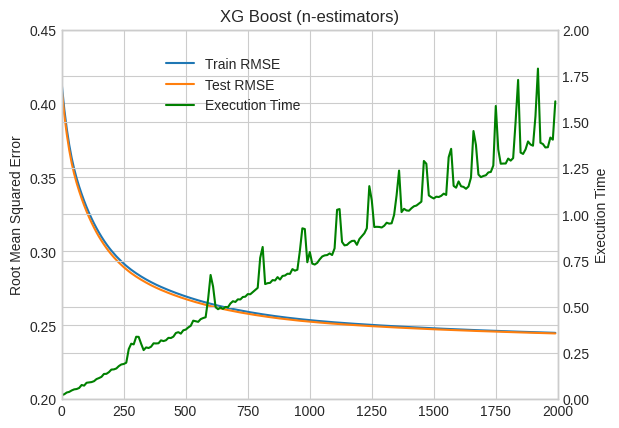

In [ ]:
fig, ax1 = plt.subplots()
# Axes 1
line1 = ax1.plot(xgb_estimators, estimators_xgb_train_rmse, label="Train RMSE");
line2 = ax1.plot(xgb_estimators, estimators_xgb_test_rmse, label="Test RMSE");
ax1.set_ylim((0.2 , 0.45))
ax1.set_ylabel('Root Mean Squared Error')
ax1.set_title("XG Boost (n-estimators)")
ax1.set_xlim(0, 2000)
# Axes 2
ax2 = ax1.twinx()
line3 = ax2.plot(xgb_estimators, estimators_xgb_execution_time, label="Execution Time", color="green")
ax2.set_ylim((0, 2))
ax2.set_ylabel('Execution Time')
# Legend
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=(0.2, 0.76))

plt.show();

#### Learning Rate

In [ ]:
%%time
# Learning Rate
xgb_learning_rate , learning_rate_xgb_train_rmse, learning_rate_xgb_test_rmse , learning_rate_xgb_execution_time = [] , [] , [], []
for lr in range(1, 206, 5):
  xgb_learning_rate.append(lr/1000)
  # Initialize XGBoostRegressor Object
  xg_reg = xgb.XGBRegressor(seed=0, # Random seed
                            learning_rate=lr/1000,    # Learning rate for gradient boosting
                            n_estimators=1000,       # Number of boosting iterations
                            max_depth=8,            # Maximum depth of trees in the ensemble
                            tree_method="gpu_hist", # Train on GPU
                            device='cuda')          # Specify calculating device as CUDA (Compute Unified Device Architecture)

  # Train the XGBoostRegressor model on training data
  start = time.time()
  xg_reg.fit(X_train, y_train)
  end = time.time()
  learning_rate_xgb_execution_time.append(end-start)

  # Make predictions using the trained model on both the training and testing data
  y_train_pred = xg_reg.predict(X_train) # Predictions on the training data
  y_test_pred = xg_reg.predict(X_test)   # Predictions on the testing data

  # Calculate and print the Root Mean Squared Error (RMSE) scores for training and testing data
  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data
  learning_rate_xgb_train_rmse.append(rmse_train)
  learning_rate_xgb_test_rmse.append(rmse_test)

CPU times: user 1min 57s, sys: 380 ms, total: 1min 57s
Wall time: 1min 58s


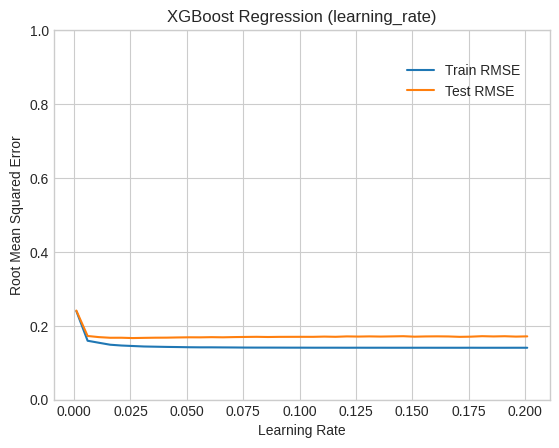

In [ ]:
plt.figure()
plt.plot(xgb_learning_rate, learning_rate_xgb_train_rmse, label="Train RMSE");
plt.plot(xgb_learning_rate, learning_rate_xgb_test_rmse, label="Test RMSE");
# plt.vlines(x=0.025, ymin=0.07, ymax=0.19, linestyles="dashed", colors='red')
plt.xlabel("Learning Rate")
plt.ylabel("Root Mean Squared Error")
plt.ylim((0, 1))
plt.title("XGBoost Regression (learning_rate)")
plt.legend(loc=(0.7, 0.8))
plt.show();

#### Max_depth

In [ ]:
%%time
# Depth
depth , depth_xgb_train_rmse, depth_xgb_test_rmse , depth_xgb_execution_time = [] , [] , [], []
for d in range(1, 21, 1):
  depth.append(d)
  # Initialize XGBoostRegressor Object
  xg_reg = xgb.XGBRegressor(seed=0, # Random seed
                            learning_rate=0.025,    # Learning rate for gradient boosting
                            n_estimators=1000,       # Number of boosting iterations
                            max_depth=d,            # Maximum depth of trees in the ensemble
                            tree_method="gpu_hist", # Train on GPU
                            device='cuda')          # Specify calculating device as CUDA (Compute Unified Device Architecture)

  # Train the XGBoostRegressor model on training data
  start = time.time()
  xg_reg.fit(X_train, y_train)
  end = time.time()
  depth_xgb_execution_time.append(end-start)

  # Make predictions using the trained model on both the training and testing data
  y_train_pred = xg_reg.predict(X_train) # Predictions on the training data
  y_test_pred = xg_reg.predict(X_test)   # Predictions on the testing data

  # Calculate and print the Root Mean Squared Error (RMSE) scores for training and testing data
  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data
  depth_xgb_train_rmse.append(rmse_train)
  depth_xgb_test_rmse.append(rmse_test)

CPU times: user 2min 2s, sys: 1.28 s, total: 2min 3s
Wall time: 2min 1s


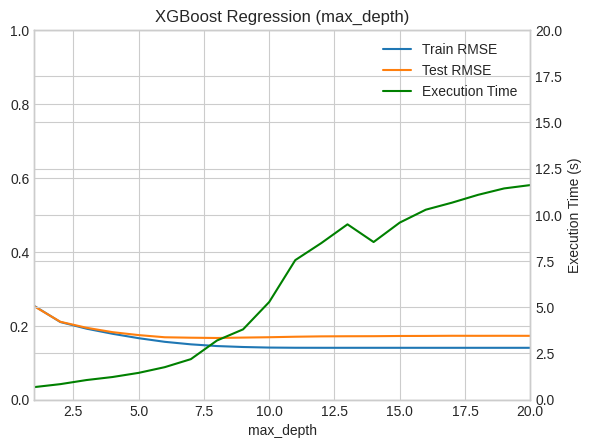

In [ ]:
fig, ax1 = plt.subplots()
# Axes 1
line1 = ax1.plot(depth, depth_xgb_train_rmse, label="Train RMSE");
line2 = ax1.plot(depth, depth_xgb_test_rmse, label="Test RMSE");
ax1.set_label("Root Mean Squared Error")
ax1.set_ylim((0, 1))
ax1.set_xlim([1, 20])
ax1.set_xlabel("max_depth")
ax1.set_title("XGBoost Regression (max_depth)")
# Axes 2
ax2 = ax1.twinx()
line3 = ax2.plot(depth, depth_xgb_execution_time , label="Execution Time", color="green")
ax2.set_ylabel("Execution Time (s)")
ax2.set_ylim((0, 20))
# Legend
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels)

plt.show();

## Random Forest Regressor

### Overview

In [ ]:
%%time
# Initialize Data
# Create a copy of DataFrame to apply modification
encoded_car_details = car_details.copy()

# Identify categorical columns in the DataFrame 'car_details'. These columns contain non-numeric data
categorical_cols = encoded_car_details.select_dtypes(include=['object']).columns

# Instantiate LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder on Categorical Feature columns
encoded_car_details[categorical_cols] = encoded_car_details[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Split the data into training and testing sets
# The split is done with a 30% test size, a random seed of 0, and stratification based on the selected column
train, test = train_test_split(encoded_car_details, test_size=0.3, random_state=0)

# 'X_train' and 'y_train' will contain the training features and labels, respectively
X_train = train.drop('log10_price',axis=1)
y_train = train['log10_price']

# 'X_test' and 'y_test' will contain the testing features and labels, respectively
X_test = test.drop('log10_price',axis=1)
y_test = test['log10_price']

# Print the dimensions of the training and testing sets. This provides insight into the sizes of the datasets
print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}, y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}")

# Specify the training parameters for the RandomForestRegressor model
random_forest_regressor = RandomForestRegressor(n_estimators=100,
                                                criterion='squared_error',
                                                max_depth=None,
                                                bootstrap=True,
                                                n_jobs=-1,
                                                random_state=0)

# Train the RandomForestRegressor model on the training data
start = time.time()
random_forest_regressor.fit(X_train, y_train)
end = time.time()
print(f"Training time: {round(end-start, 2)}")

# Make predictions using the trained model on both the training and testing data
start = time.time()
y_train_pred = random_forest_regressor.predict(X_train)  # Predictions on the training data
y_test_pred = random_forest_regressor.predict(X_test)    # Predictions on the testing data
end = time.time()
print(f'Predict time: {round(end-start, 2)}')

# Calculate and print the Root Mean Squared Error (RMSE) scores for training and testing data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data

# Print the rounded RMSE scores
print('\nEvaluation results on test set:')
print(f"RMSE score for train {round(rmse_train, 4)} ({round((10**rmse_train),2)} triệu VNĐ) dex, and for test {round(rmse_test, 4)} ({round((10**rmse_test),2)} triệu VNĐ) dex\n")

X_train.shape: (21291, 15), X_test.shape: (9126, 15), y_train.shape: (21291,), y_test.shape: (9126,)
Training time: 4.42
Predict time: 0.54

Evaluation results on test set:
RMSE score for train 0.0894 (1.23 triệu VNĐ) dex, and for test 0.1758 (1.5 triệu VNĐ) dex

CPU times: user 9.6 s, sys: 95.4 ms, total: 9.7 s
Wall time: 5.09 s


### Feature Engineering

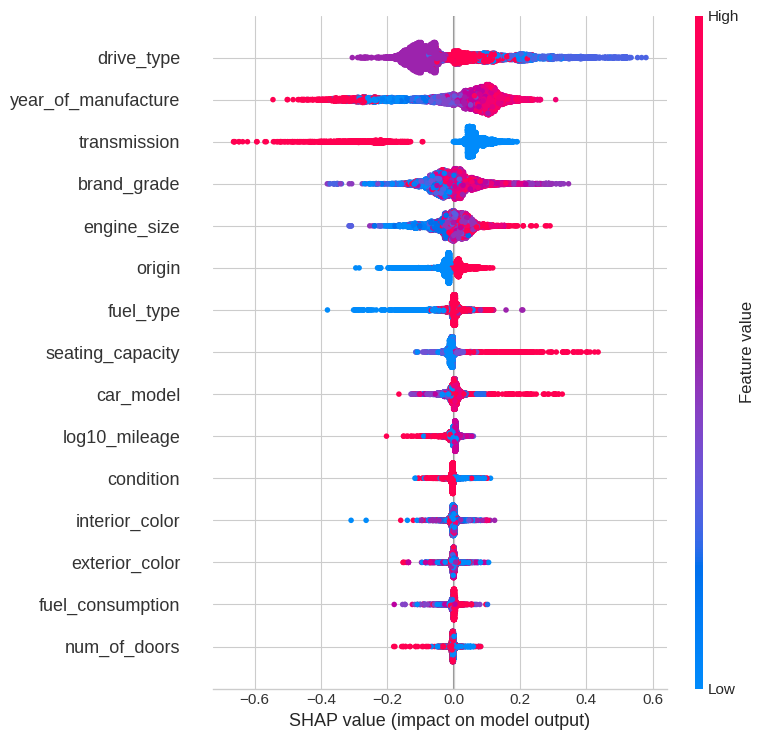

CPU times: user 1h 42min 21s, sys: 19.6 s, total: 1h 42min 41s
Wall time: 1h 42min 35s


In [ ]:
%%time
# Initialize Data
# Create a copy of DataFrame to apply modification
encoded_car_details = car_details.copy()

# Identify categorical columns in the DataFrame 'car_details'. These columns contain non-numeric data
categorical_cols = encoded_car_details.select_dtypes(include=['object']).columns

# Instantiate LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder on Categorical Feature columns
encoded_car_details[categorical_cols] = encoded_car_details[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Split the data into training and testing sets
# The split is done with a 30% test size, a random seed of 0, and stratification based on the selected column
train, test = train_test_split(encoded_car_details, test_size=0.3, random_state=0)

# 'X_train' and 'y_train' will contain the training features and labels, respectively
X_train = train.drop('log10_price',axis=1)
y_train = train['log10_price']

# 'X_test' and 'y_test' will contain the testing features and labels, respectively
X_test = test.drop('log10_price',axis=1)
y_test = test['log10_price']

# Initialize the SHAP library for visualization
shap.initjs()

# Create a Explainer object for the 'model' (assumes 'model' is a tree-based model like a Random Forest or XGBoost)
ex = shap.TreeExplainer(random_forest_regressor)

# Calculate SHAP values for the 'X_test' data using the TreeExplainer
shap_values = ex.shap_values(X_test)

# Generate a summary plot to visualize the impact of features on model predictions
shap.summary_plot(shap_values, X_test)

### Parameter Tuning

#### N_Estimators

In [ ]:
%%time
rdf_estimators, random_forest_estimators_train_rmse, random_forest_estimators_test_rmse = [], [], []

for e in range(1, 500, 10):
  rdf_estimators.append(e)
  # Specify the training parameters for the RandomForestRegressor model
  random_forest_regressor = RandomForestRegressor(n_estimators=e,
                                                  criterion='squared_error',
                                                  max_depth=None,
                                                  bootstrap=True,
                                                  n_jobs=-1,
                                                  random_state=0)

  # Train the RandomForestRegressor model on the training data
  random_forest_regressor.fit(X_train, y_train)

  # Make predictions using the trained model on both the training and testing data
  y_train_pred = random_forest_regressor.predict(X_train)  # Predictions on the training data
  y_test_pred = random_forest_regressor.predict(X_test)    # Predictions on the testing data

  # Calculate and print the Root Mean Squared Error (RMSE) scores for training and testing data
  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data
  random_forest_estimators_train_rmse.append(rmse_train)
  random_forest_estimators_test_rmse.append(rmse_test)

CPU times: user 20min 27s, sys: 13.1 s, total: 20min 40s
Wall time: 11min 50s


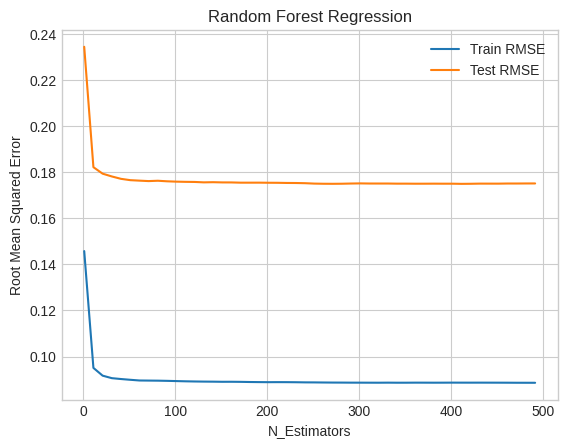

In [ ]:
plt.figure()
plt.plot(rdf_estimators, random_forest_estimators_train_rmse, label="Train RMSE");
plt.plot(rdf_estimators, random_forest_estimators_test_rmse, label="Test RMSE");
# plt.vlines(x=8, ymin=0.05, ymax=0.3, linestyles="dashed", colors='red')
plt.xlabel("N_Estimators" )
plt.ylabel("Root Mean Squared Error")
# plt.ylim((0.05 ,0.3))
# plt.xlim((1,20))
# plt.xticks([x for x in range(1,21,1)])
plt.title("Random Forest Regression")
plt.legend()
plt.show();

## K Nearest Neighbors

### Overview

In [ ]:
# Initialize Data
# Create a copy of DataFrame to apply modification
encoded_car_details = car_details.copy()

# Identify categorical columns in the DataFrame 'car_details'. These columns contain non-numeric data
categorical_cols = encoded_car_details.select_dtypes(include=['object']).columns

# Instantiate LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder on Categorical Feature columns
encoded_car_details[categorical_cols] = encoded_car_details[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Split the data into training and testing sets
# The split is done with a 30% test size, a random seed of 0, and stratification based on the selected column
train, test = train_test_split(encoded_car_details, test_size=0.3, random_state=0)

# 'X_train' and 'y_train' will contain the training features and labels, respectively
X_train = train.drop('log10_price',axis=1)
y_train = train['log10_price']

# 'X_test' and 'y_test' will contain the testing features and labels, respectively
X_test = test.drop('log10_price',axis=1)
y_test = test['log10_price']

# Print the dimensions of the training and testing sets. This provides insight into the sizes of the datasets
print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}, y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}")

# Specify the training parameters for the KNeighborsRegressor model
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the KNeighborsRegressor model on the training data
start = time.time()
knn_regressor.fit(X_train, y_train)
end = time.time()
print(f"Training time: {round(end-start, 2)}")

# Make predictions using the trained model on both the training and testing data
start = time.time()
y_train_pred = knn_regressor.predict(X_train)  # Predictions on the training data
y_test_pred = knn_regressor.predict(X_test)    # Predictions on the testing data
end = time.time()
print(f'Predict time: {round(end-start, 2)}')

# Calculate and print the Root Mean Squared Error (RMSE) scores for training and testing data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data

# Print the rounded RMSE scores
print('\nEvaluation results on test set:')
print(f"RMSE score for train {round(rmse_train, 4)} ({round((10**rmse_train),2)} triệu VNĐ) dex, and for test {round(rmse_test, 4)} ({round((10**rmse_test),2)} triệu VNĐ) dex\n")

X_train.shape: (21291, 15), X_test.shape: (9126, 15), y_train.shape: (21291,), y_test.shape: (9126,)
Training time: 0.06
Predict time: 0.89

Evaluation results on test set:
RMSE score for train 0.1715 (1.48 triệu VNĐ) dex, and for test 0.2174 (1.65 triệu VNĐ) dex



### Parameter Tuning

#### N-Neighbors

In [ ]:
neighbors , knn_train_rmse, knn_test_rmse = [] , [] , []

for n in range(1, 51, 1):
  neighbors.append(n)
  # Specify the training parameters for the KNeighborsRegressor model
  knn_regressor = KNeighborsRegressor(n_neighbors=n)

  # Train the KNeighborsRegressor model on the training data
  knn_regressor.fit(X_train, y_train)

  # Make predictions using the trained model on both the training and testing data
  y_train_pred = knn_regressor.predict(X_train)  # Predictions on the training data
  y_test_pred = knn_regressor.predict(X_test)    # Predictions on the testing data

  # Calculate and print the Root Mean Squared Error (RMSE) scores for training and testing data
  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data
  knn_train_rmse.append(rmse_train)
  knn_test_rmse.append(rmse_test)

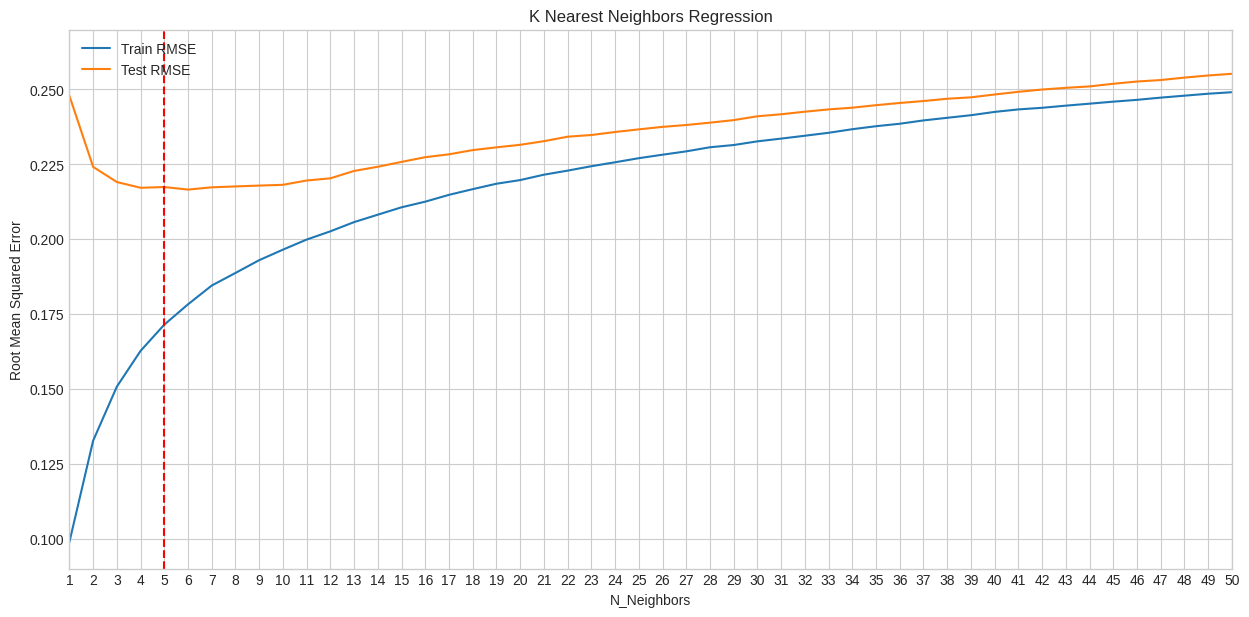

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(neighbors, knn_train_rmse, label="Train RMSE");
plt.plot(neighbors, knn_test_rmse, label="Test RMSE");
plt.vlines(x=5, ymin=0.09, ymax=0.3, linestyles="dashed", colors='red')
plt.xlabel("N_Neighbors" )
plt.xticks([x for x in range(1, 51, 1)])
plt.ylabel("Root Mean Squared Error")
plt.xlim((1 , 50))
plt.ylim((0.09 , 0.27))
plt.title("K Nearest Neighbors Regression")
plt.legend()
plt.show();

## Support Vector Regressor

### Overview

In [ ]:
%%time
# Initialize Data
# Create a copy of DataFrame to apply modification
encoded_car_details = car_details.copy()

# Identify categorical columns in the DataFrame 'car_details'. These columns contain non-numeric data
categorical_cols = encoded_car_details.select_dtypes(include=['object']).columns

# Instantiate LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder on Categorical Feature columns
encoded_car_details[categorical_cols] = encoded_car_details[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Split the data into training and testing sets
# The split is done with a 30% test size, a random seed of 0, and stratification based on the selected column
train, test = train_test_split(encoded_car_details, test_size=0.3, random_state=0)

# 'X_train' and 'y_train' will contain the training features and labels, respectively
X_train = train.drop('log10_price',axis=1)
y_train = train['log10_price']

# 'X_test' and 'y_test' will contain the testing features and labels, respectively
X_test = test.drop('log10_price',axis=1)
y_test = test['log10_price']

# Normalization
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

# Print the dimensions of the training and testing sets. This provides insight into the sizes of the datasets
print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}, y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}")

# Specify the training parameters for the SVR model
svr = SVR()

# Train the SVR model on the training data
start = time.time()
svr.fit(X_train, y_train)
end = time.time()
print(f"Training time: {round(end-start, 2)}")

# Make predictions using the trained model on both the training and testing data
start = time.time()
y_train_pred = svr.predict(X_train)  # Predictions on the training data
y_test_pred = svr.predict(X_test)    # Predictions on the testing data
end = time.time()
print(f'Predict time: {round(end-start, 2)}')

# Calculate and print the Root Mean Squared Error (RMSE) scores for training and testing data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data

# Print the rounded RMSE scores
print('\nEvaluation results on test set:')
print(f"RMSE score for train {round(rmse_train, 4)} ({round((10**rmse_train),2)} triệu VNĐ) dex, and for test {round(rmse_test, 4)} ({round((10**rmse_test),2)} triệu VNĐ) dex\n")

X_train.shape: (21291, 15), X_test.shape: (9126, 15), y_train.shape: (21291,), y_test.shape: (9126,)
Training time: 12.53
Predict time: 11.72

Evaluation results on test set:
RMSE score for train 0.1899 (1.55 triệu VNĐ) dex, and for test 0.2052 (1.6 triệu VNĐ) dex

CPU times: user 24 s, sys: 118 ms, total: 24.2 s
Wall time: 24.4 s


## BagggingRegressor

In [ ]:
%%time
# Initialize Data
# Create a copy of DataFrame to apply modification
encoded_car_details = car_details.copy()

# Identify categorical columns in the DataFrame 'car_details'. These columns contain non-numeric data
categorical_cols = encoded_car_details.select_dtypes(include=['object']).columns

# Instantiate LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder on Categorical Feature columns
encoded_car_details[categorical_cols] = encoded_car_details[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Split the data into training and testing sets
# The split is done with a 30% test size, a random seed of 0, and stratification based on the selected column
train, test = train_test_split(encoded_car_details, test_size=0.3, random_state=0)

# 'X_train' and 'y_train' will contain the training features and labels, respectively
X_train = train.drop('log10_price',axis=1)
y_train = train['log10_price']

# 'X_test' and 'y_test' will contain the testing features and labels, respectively
X_test = test.drop('log10_price',axis=1)
y_test = test['log10_price']

# Print the dimensions of the training and testing sets. This provides insight into the sizes of the datasets
print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}, y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}")

# Specify the training parameters for the BaggingRegressor model
bagging_regressor = BaggingRegressor(tree.DecisionTreeRegressor(random_state=0))

# Train the BaggingRegressor model on the training data
start = time.time()
bagging_regressor.fit(X_train, y_train)
end = time.time()
print(f"Training Time: {round(end-start,4)}")

# Make predictions using the trained model on both the training and testing data
start = time.time()
y_train_pred = bagging_regressor.predict(X_train)  # Predictions on the training data
y_test_pred = bagging_regressor.predict(X_test)    # Predictions on the testing data
end = time.time()
print(f"Predicting Time: {round(end-start,4)}")

# Calculate and print the Root Mean Squared Error (RMSE) scores for training and testing data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training data
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)     # RMSE for testing data

# Print the rounded RMSE scores
print('\nEvaluation results on test set:')
print(f"RMSE score for train {round(rmse_train, 4)} ({round((10**rmse_train),2)} triệu VNĐ) dex, and for test {round(rmse_test, 4)} ({round((10**rmse_test),2)} triệu VNĐ) dex\n")

X_train.shape: (21291, 15), X_test.shape: (9126, 15), y_train.shape: (21291,), y_test.shape: (9126,)
Training Time: 0.6577
Predicting Time: 0.101

Evaluation results on test set:
RMSE score for train 0.096 (1.25 triệu VNĐ) dex, and for test 0.1819 (1.52 triệu VNĐ) dex

CPU times: user 882 ms, sys: 1.97 ms, total: 884 ms
Wall time: 890 ms
